**don't forget to upload spotify-2023.csv first**

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import codecs

# just shows all rows and columns, comment it out if you don't want it
pd.options.display.max_columns = None
pd.options.display.max_rows = None

with codecs.open('spotify-2023.csv', 'r', encoding='ISO-8859-1') as f:
   spotify_data = pd.read_csv(f)

## **Data Cleaning & Sanity Checks**

In [ ]:
spotify_data.shape

(953, 24)

In [ ]:
#Check NaN in all cols
spotify_data.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

**Streams Issue**

In [ ]:
# all values in streams should be numbers. check column "streams" if there's any non-numeric value
numeric_col = pd.to_numeric(spotify_data['streams'],errors = 'coerce')
non_numeric_value = spotify_data[numeric_col.isna()]
# Fix non-numeric streams
# Check the streams on spofity for song "Love Grows (Where My Rosemary Goes)" - https://open.spotify.com/track/5Ts1DYOuouQLgzTaisxWYh
# Update the streams of the song in spotify_data
spotify_data.at[574,'streams'] = 217406333
spotify_data.loc[574]['streams']

217406333

**Dropping unnecessary columns**

In [ ]:
#droping in_shazam_charts
spotify_data = spotify_data.drop("in_shazam_charts", axis = 1)

#droping instrumentalness_% as 863 value are 0s
spotify_data = spotify_data.drop("instrumentalness_%", axis = 1)

# checking to see if the column has been dropped
spotify_data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'liveness_%', 'speechiness_%'],
      dtype='object')

In [ ]:
#print out the row number that have empty NaN in key features
rows_with_nan_in_key = spotify_data[spotify_data["key"].isna()]
rows_with_nan_in_key.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,215,745,58,118,NaN,Major,71,65,68,6,3,7
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,30546883,80,227,95,24,78,NaN,Major,44,14,9,96,10,3
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1297026226,24,98,582,2,135,NaN,Minor,48,44,42,12,11,3
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8,2023,6,1,1150,31,123122413,22,33,34,7,120,NaN,Major,81,63,68,11,11,4
44,Barbie World (with Aqua) [From Barbie The Album],"Nicki Minaj, Aqua, Ice Spice",3,2023,6,23,1117,80,65156199,82,145,65,16,144,NaN,Major,77,75,58,52,23,25


In [ ]:
# adding C major keys for the indicated rows:

C_major_rows = [12, 17, 35, 44, 46, 124, 127, 134, 135, 144, 151, 152, 156, 161, 164, 169, 178,
              181, 187, 195, 259, 281, 290, 310, 314, 332, 373, 379, 381, 385, 396, 405, 409,
              413, 438, 462, 464, 475, 477, 511, 531, 537, 552, 554, 578, 586, 599, 603, 609, 644,
              652, 676, 711, 713, 727, 730, 745, 770, 772, 806, 831, 839, 858, 860, 873, 882,
              884, 895, 899, 901, 903, 938, 940 ]

key_to_assign = "C"

spotify_data.loc[C_major_rows, "key"] = key_to_assign


In [ ]:
# adding C minor keys for the indicated rows:
C_minor_rows = [22, 58, 59, 287, 325, 330, 354, 363, 395, 504, 506, 559, 575, 664, 688, 704, 717,
              767, 852]

key_assign = "C"

spotify_data.loc[C_minor_rows, "key"] = key_assign


In [ ]:
# adding "C#" major key for the indicated row:
C_sharp_major_row = [560]

key_assign_Csharp = "C#"

spotify_data.loc[C_sharp_major_row, "key"] = key_assign_Csharp


In [ ]:
# adding B major to the follow row
B_major_row = [459]

key_assign = "B"

spotify_data.loc[B_major_row, "key"] = key_assign


In [ ]:
# adding A major to the follow row
A_major_row = [532]

key_assign_A = "A"

spotify_data.loc[A_major_row, "key"] = key_assign_A


In [ ]:
# Check if any NaN
spotify_data.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
liveness_%              0
speechiness_%           0
dtype: int64

**Encoding Problems**

In [ ]:
spotify_data.track_name = spotify_data.track_name.str.replace('Taylorï¿½ï¿½ï¿½s Ve', 'Taylor\'s Ve')
spotify_data.track_name = spotify_data.track_name.str.replace('Frï¿½ï¿½gil', 'Frágil')
spotify_data.track_name = spotify_data.track_name.str.replace('Tï¿½ï¿', 'Tá OK')
spotify_data.track_name = spotify_data.track_name.str.replace('CORAZï¿½ï¿½N VA', 'CORAZÓN VA')
spotify_data.track_name = spotify_data.track_name.str.replace('Novidade na ï¿½ï¿', 'Novidade na Área')
spotify_data.track_name = spotify_data.track_name.str.replace('Donï¿½ï¿½ï¿½t Bl', 'Don\t Bl')
spotify_data.track_name = spotify_data.track_name.str.replace('Feliz Cumpleaï¿½ï¿½os Fe', 'Feliz Cumpleaños Fe')
spotify_data.track_name = spotify_data.track_name.str.replace('Novo Balanï¿½', 'Novo Balanç')
spotify_data.track_name = spotify_data.track_name.str.replace('Acrï¿½ï¿½s', 'Acrós')
spotify_data.track_name = spotify_data.track_name.str.replace('Piï¿½ï¿½man Deï¿', 'Pişman Değ')
spotify_data.track_name = spotify_data.track_name.str.replace('Pişman Değ½', 'Pişman Değ')
spotify_data.track_name = spotify_data.track_name.str.replace('Niï¿½ï¿½a Bo', 'Niña Bo')
spotify_data.track_name = spotify_data.track_name.str.replace('Cartï¿½ï¿½o B', 'Cartão B')
spotify_data.track_name = spotify_data.track_name.str.replace('Conexï¿½ï¿½es de Mï¿½ï¿½fia', 'Conexões de Máfia')
spotify_data.track_name = spotify_data.track_name.str.replace('Titi Me Preguntï¿', 'Tití Me Preguntó')
spotify_data.track_name = spotify_data.track_name.str.replace('Cupid ï¿½ï¿½ï¿½ Twin Ver', 'Cupid - Twin Ver')
spotify_data.track_name = spotify_data.track_name.str.replace('ï¿½ï¿½ï¿½ Spe', '- Spe')
spotify_data.track_name = spotify_data.track_name.str.replace('Igualito a Mi Apï¿', 'Igualito a Mi Apá')
spotify_data.track_name = spotify_data.track_name.str.replace('Igualito a Mi Apá½', 'Igualito a Mi Apá')
spotify_data.track_name = spotify_data.track_name.str.replace('DESPECHï¿', 'DESPECHÁ')
spotify_data.track_name = spotify_data.track_name.str.replace('Arcï¿½ï¿½ngel: Bzrp Music Sessions', 'Arcángel: Bzrp Music Sessions')
spotify_data.track_name = spotify_data.track_name.str.replace('Ainï¿½ï¿½ï¿½t Th', 'Ain\'t Th')
spotify_data.track_name = spotify_data.track_name.str.replace('Thinkinï¿½ï¿½ï¿½ B', 'Thinkin\' B')
spotify_data.track_name = spotify_data.track_name.str.replace('PLAYA DEL INGLï¿½', 'PLAYA DEL INGLÉS')
spotify_data.track_name = spotify_data.track_name.str.replace('PERO Tï¿', 'PERO TÚ')
spotify_data.track_name = spotify_data.track_name.str.replace('PERO TÚ½', 'PERO TÚ')
spotify_data.track_name = spotify_data.track_name.str.replace('Monotonï¿½', 'Monotonía')
spotify_data.track_name = spotify_data.track_name.str.replace('Sem Alianï¿½ï¿½a no', 'Sem Aliança no')
spotify_data.track_name = spotify_data.track_name.str.replace('LA CANCIï¿½', 'LA CANCIÓN')
spotify_data.track_name = spotify_data.track_name.str.replace('Quï¿½ï¿½ Ago', 'Qué Ago')
spotify_data.track_name = spotify_data.track_name.str.replace('Devil Donï¿½ï¿½ï¿½', 'Devil Don\'')
spotify_data.track_name = spotify_data.track_name.str.replace('Muï¿½ï¿½', 'Muñ')
spotify_data.track_name = spotify_data.track_name.str.replace('Evergreen \\(You Didnï¿½ï¿½ï¿½t Deserve Me A', 'Evergreen (You Didn\'t Deserve Me A')
spotify_data.track_name = spotify_data.track_name.str.replace('ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½', '死ぬのがいいわ')
spotify_data.track_name = spotify_data.track_name.str.replace('ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½', 'アイドル')
spotify_data.track_name = spotify_data.track_name.str.replace('ï¿½ï¿½ï¿½98 Braves', '\'98 Braves')
spotify_data.track_name = spotify_data.track_name.str.replace('Agudo Mï¿½ï¿½gi', 'Agudo Mági')
spotify_data.track_name = spotify_data.track_name.str.replace('Tubarï¿½ï¿½o Te', 'Tubarão Te')
spotify_data.track_name = spotify_data.track_name.str.replace('ï¿½ï¿½ï¿½abcdefu', 'abcdefu')
spotify_data.track_name = spotify_data.track_name.str.replace('Here We Goï¿½ï¿½ï¿½ Again \\(feat. Tyler, the Cr', 'Here We Go... Again (feat. Tyler, the Cr')
# spotify_data.track_name = spotify_data.track_name.str.replace('Malvadï¿½ï¿½', 'Malvadão')
spotify_data.track_name = spotify_data.track_name.str.replace('Malvadï¿½ï¿', 'Malvadão')
spotify_data.track_name = spotify_data.track_name.str.replace('Donï¿½ï¿½ï¿½t Break My', 'Don\'t Break My')
# spotify_data.track_name = spotify_data.track_name.str.replace('Volvï¿½', 'Volví')
spotify_data.track_name = spotify_data.track_name.str.replace('Volvï¿', 'Volví')
# spotify_data.track_name = spotify_data.track_name.str.replace('Lï¿½ï¿½ï¿½', 'L\'enfer')
spotify_data.track_name = spotify_data.track_name.str.replace('Lï¿½ï¿½ï¿', 'L\'enfer')
spotify_data.track_name = spotify_data.track_name.str.replace('Nostï¿½ï¿½l', 'Nostálgico')
spotify_data.track_name = spotify_data.track_name.str.replace('Vai Lï¿½ï¿½ Em Casa', 'Vai Lá Em Casa')
spotify_data.track_name = spotify_data.track_name.str.replace('Leï¿½', 'Leã')
# spotify_data.track_name = spotify_data.track_name.str.replace('Quï¿½ï¿½ Mï¿½ï¿½', 'Qué Má')
spotify_data.track_name = spotify_data.track_name.str.replace('Quï¿½ï¿½ Mï¿½ï¿', 'Qué Má')
spotify_data.track_name = spotify_data.track_name.str.replace('When Iï¿½ï¿½ï¿½m Gone \\(with Katy', 'When I\'m Gone (with Katy')
spotify_data.track_name = spotify_data.track_name.str.replace('Esqueï¿½ï¿½a-Me Se For C', 'Esqueça-me Se For C')
spotify_data.track_name = spotify_data.track_name.str.replace('Miï¿½ï¿½n', 'Mién')
spotify_data.track_name = spotify_data.track_name.str.replace('Sï¿½ï¿½', 'Sú')
spotify_data.track_name = spotify_data.track_name.str.replace('Cayï¿½ï¿½ La Noche \\(feat. Cruz Cafunï¿½ï¿½, Ab', 'Cayó La Noche (feat. Cruz Cafuné, Ab')
spotify_data.track_name = spotify_data.track_name.str.replace('Problemï¿½', 'Problemó')
spotify_data.track_name = spotify_data.track_name.str.replace('Seï¿½ï¿½o', 'Seño')
spotify_data.track_name = spotify_data.track_name.str.replace('Una Noche en Medellï¿½', 'Una Noche En Medellí')
spotify_data.track_name = spotify_data.track_name.str.replace('DANï¿½ï¿½A', ' DANÇA')
spotify_data.track_name = spotify_data.track_name.str.replace('Monï¿½ï¿½y so', 'Monëy so')
spotify_data.track_name = spotify_data.track_name.str.replace('X ï¿½ï¿½LTIMA', 'X ÚLTIMA')
# spotify_data.track_name = spotify_data.track_name.str.replace('Me Arrepentï¿½', 'Me Arrepentí')
spotify_data.track_name = spotify_data.track_name.str.replace('Me Arrepentï¿', 'Me Arrepentí')
spotify_data.track_name = spotify_data.track_name.str.replace('RUMBATï¿½', 'RUMBATÓ')
spotify_data.track_name = spotify_data.track_name.str.replace('Despuï¿½ï¿½s de la P', 'Después de la P')
spotify_data.track_name = spotify_data.track_name.str.replace('Ensï¿½ï¿½ï¿½ï¿½ame', 'Enséñame')
spotify_data.track_name = spotify_data.track_name.str.replace('El Apagï¿½', 'El Apagó')
spotify_data.track_name = spotify_data.track_name.str.replace('TUS Lï¿½ï¿½GR', ' TUS LÁGR')
spotify_data.track_name = spotify_data.track_name.str.replace('La Llevo Al Cielo \\(Ft. ï¿½ï¿½engo F', 'La Llevo Al Cielo (Ft. Ñengo F')
spotify_data.track_name = spotify_data.track_name.str.replace('cï¿½ï¿½mo dormi', 'cómo dormi')
# spotify_data.track_name = spotify_data.track_name.str.replace('Si Te La Encuentras Por Ahï¿½', 'Si Te La Encuentras Por Ahí')
spotify_data.track_name = spotify_data.track_name.str.replace('Si Te La Encuentras Por Ahï¿', 'Si Te La Encuentras Por Ahí')
# spotify_data.track_name = spotify_data.track_name.str.replace('XQ Te Pones Asï¿½', 'XQ Te Pones Así')
spotify_data.track_name = spotify_data.track_name.str.replace('XQ Te Pones Asï¿', 'XQ Te Pones Así')
# spotify_data.track_name = spotify_data.track_name.str.replace('Sin Seï¿½ï¿½', 'Sin Señal')
spotify_data.track_name = spotify_data.track_name.str.replace('Sin Seï¿½ï', 'Sin Señal')
spotify_data.track_name = spotify_data.track_name.str.replace('DESPECHÁ½', 'DESPECHÁ')
spotify_data.track_name = spotify_data.track_name.str.replace('Tá OK½', 'Tá OK')
spotify_data.track_name = spotify_data.track_name.str.replace('Novidade na Área½', 'Novidade na Área')
spotify_data.track_name = spotify_data.track_name.str.replace('Tití Me Preguntó½', 'Tití Me Preguntó')
spotify_data.track_name = spotify_data.track_name.str.replace('Cï¿½ï¿½', 'Cú')

spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('ROSALï¿½', 'ROSALÍA')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Tiï¿½ï¿½sto', 'Tiësto')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Tiï¿½ï¿', 'Tië')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Marï¿½ï¿½lia Mendo', 'Marília Mendo')
# spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Beyoncï¿½', 'Beyoncé')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Beyoncï¿', 'Beyoncé')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Marília Mendonï¿½ï¿½a', 'Marília Mendonça')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Cruz Cafunï¿½ï¿½', 'Cruz Cafuné')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Rï¿½ï¿½ma, Selena G', 'Rema, Selena G')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Rï¿½ï', 'Re')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Bomba Estï¿½ï¿½reo', 'Bomba Estéreo')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Jasiel Nuï¿½ï¿½ez', 'Jasiel Nuñez')
# spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Beï¿½ï¿½', 'Beé')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Beï¿½ï', 'Beé')
# spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Michael Bublï¿½', 'Michael Bublé')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Michael Bublï¿', 'Michael Bublé')
# spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Eden Muï¿½ï¿½', 'Eden Muñoz')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Eden Muï¿½ï', 'Eden Muñoz')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Doï¿½ï¿½u', 'Doğu')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Josï¿½ï¿½ Felic', 'José Felic')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Zï¿½ï¿½ Neto', 'Zé Neto')
# spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Matuï¿½', 'Matuê')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Matuï¿', 'Matuê')
# spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Rï¿½ï¿½', 'Rema')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Rï¿½ï¿', 'Rema')
# spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Elley Duhï¿½', 'Elley  Duhé')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Elley Duhï¿', 'Elley  Duhé')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Dj LK da Escï¿½ï¿½cia', 'Dj LK da Escócia')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Mï¿½ï¿½ne', 'Måneskin')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Xamï¿½ï¿½', 'Xamã')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Lenny Tavï¿½ï¿½rez', 'Lenny Tavárez')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Tiï¿½ï¿½', 'Tiësto')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Zï¿½ï¿½ Fe', 'Zé Fe')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Matuêï¿½', 'Matuê')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Luï¿½ï¿½sa Sonza', 'Luísa Sonza')
# spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('The Marï¿½ï¿½', 'The Marí')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('The Marï¿½ï', 'The Marí')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Schï¿½ï¿½rze', 'Schürze')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Bï¿½', 'BIA')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('Pixarï¿½ï¿½ï¿½s', 'Pixar\'s')
spotify_data['artist(s)_name'] = spotify_data['artist(s)_name'].str.replace('BIAï¿½jo', 'Bejo')

# spotify_data[spotify_data['artist(s)_name'].str.count('ï¿') > 0]
# spotify_data[spotify_data['artist(s)_name'].str.count('ï') > 0]
# spotify_data[spotify_data['artist(s)_name'].str.count('¿') > 0]
# spotify_data[spotify_data['artist(s)_name'].str.count('½') > 0]
# spotify_data[spotify_data['artist(s)_name'].str.count('Ã') > 0]

# spotify_data[spotify_data.track_name.str.count('ï¿') > 0]
# spotify_data[spotify_data.track_name.str.count('ï') > 0]
# spotify_data[spotify_data.track_name.str.count('¿') > 0]
# spotify_data[spotify_data.track_name.str.count('½') > 0]
# spotify_data[spotify_data.track_name.str.count('Ã') > 0]

<ipython-input-298-343f9d05f249>:33: FutureWarning: The default value of regex will change from True to False in a future version.
  spotify_data.track_name = spotify_data.track_name.str.replace('Evergreen \\(You Didnï¿½ï¿½ï¿½t Deserve Me A', 'Evergreen (You Didn\'t Deserve Me A')
<ipython-input-298-343f9d05f249>:40: FutureWarning: The default value of regex will change from True to False in a future version.
  spotify_data.track_name = spotify_data.track_name.str.replace('Here We Goï¿½ï¿½ï¿½ Again \\(feat. Tyler, the Cr', 'Here We Go... Again (feat. Tyler, the Cr')
<ipython-input-298-343f9d05f249>:53: FutureWarning: The default value of regex will change from True to False in a future version.
  spotify_data.track_name = spotify_data.track_name.str.replace('When Iï¿½ï¿½ï¿½m Gone \\(with Katy', 'When I\'m Gone (with Katy')
<ipython-input-298-343f9d05f249>:57: FutureWarning: The default value of regex will change from True to False in a future version.
  spotify_data.track_name = spotif

**Duplicate Songs and Artist (song peaked more than once)**

In [ ]:
test = spotify_data[spotify_data.duplicated(subset = ['track_name', 'artist(s)_name'], keep = False)].sort_values('track_name')

result = test.groupby(['track_name', 'artist(s)_name']).agg({
    'artist_count': 'first',
    'released_year': 'first',
    'released_month': 'first',
    'released_day': 'first',
    'in_spotify_playlists': 'mean',
    'in_spotify_charts': 'mean',
    'streams': 'max',
    'in_apple_playlists': 'mean',
    'in_deezer_playlists': 'mean',
    'in_deezer_charts': 'mean',
    # 'in_shazam_charts': 'mean',
    'bpm': 'first',
    'key': 'first',
    'mode': 'first',
    'danceability_%': 'mean',
    'valence_%': 'mean',
    'energy_%': 'mean',
    'acousticness_%': 'mean',
    'liveness_%': 'mean',
    'speechiness_%': 'mean',
}).reset_index()

int_columns = ['in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists',
               'in_deezer_playlists', 'in_deezer_charts', 'danceability_%',
               'valence_%', 'energy_%', 'acousticness_%', 'liveness_%',
               'speechiness_%']

result[int_columns] = result[int_columns].astype(int)

merged_df = pd.merge(spotify_data, test, how='left', indicator=True)
spotify_data = merged_df[merged_df['_merge'] == 'left_only'].drop('_merge', axis=1)

spotify_data = pd.concat([spotify_data, result])
spotify_data = spotify_data.reset_index(drop = True)
result

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_deezer_playlists,in_deezer_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
0,About Damn Time,Lizzo,1,2022,7,15,5676,1,723894473,121,12636,10,109,A#,Minor,84,72,74,10,34,7
1,SNAP,Rosa Linn,1,2022,3,19,2510,9,726307468,75,11331,12,170,C,Major,56,52,64,11,45,6
2,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,601,7,303216294,16,459,0,94,G#,Major,71,61,68,7,11,6
3,Take My Breath,The Weeknd,1,2021,8,6,4494,0,432702334,95,19172,0,121,A#,Minor,72,44,75,1,18,4


In [ ]:
# Convert streams to int
spotify_data['streams'] = spotify_data['streams'].astype(int)

In [ ]:
spotify_data.to_csv("cleaned_spotify_data.csv")

**Data Cleaning - January 1st Release Date**


In [ ]:
# check to see how many dates are january 1
jan_first = spotify_data[(spotify_data.released_month == 1) & (spotify_data.released_day == 1)]['track_name'].count()
jan_first


65

**Checking January 1st Dates From Rows 0 - 239**

In [ ]:
# rows 0 - 239
first = spotify_data[0:239]
# filter for January 1st
first = first[(first.released_month == 1) & (first.released_day == 1)]

first.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1297026226,24,98.0,582,2,135,C,Minor,48,44,42,12,11,3
37,Blank Space,Taylor Swift,1,2014,1,1,11434,53,1355959075,154,123.0,410,2,96,F,Major,75,57,68,9,13,6
38,Style,Taylor Swift,1,2014,1,1,7830,42,786181836,94,111.0,151,4,95,D,Major,60,48,79,0,12,4
65,Yellow,Chris Molitor,1,1999,1,1,31358,43,1755214421,196,2.0,"4,053",5,173,B,Major,43,28,66,0,23,3
75,Viva La Vida,Coldplay,1,2008,1,1,33898,62,1592909789,233,0.0,"4,095",9,138,F,Minor,49,42,62,9,11,3


In [ ]:
# I Wanna Be Yours - Artic Monkeys (month, day)
spotify_data.loc[22, ['released_month', 'released_day']] = [9, 9]

# Blank Space - Taylor Swift (month, day)
spotify_data.loc[37, ['released_month', 'released_day']] = [10, 27]

# Style	- Taylor Swift (month, day)
spotify_data.loc[38, ['released_month', 'released_day']] = [10, 27]

# Yellow - Chris Molitor (year)
spotify_data.loc[65, ['released_year']] = [2000]

# Viva la Vida - Coldplay (month, day)
spotify_data.loc[75, ['released_month', 'released_day']] = [5, 26]

# Riptide - Vance Joy (month, day)
spotify_data.loc[80, ['released_month', 'released_day']] = [9, 9]

# Summertime Sadness - Lana Del Rey	(month, day, year)
spotify_data.loc[98, ['released_month', 'released_day', 'released_year']] = [11, 12, 2012]

# Lover - Taylor Switft (month, day, year)
spotify_data.loc[100, ['released_month', 'released_day', 'released_year']] = [8, 23, 2019]

# Mockingbird - Eminem (month, day)
spotify_data.loc[103, ['released_month', 'released_day']] = [11, 12]

# Set Fire to the Rain - Adele (month, day)
spotify_data.loc[109, ['released_month', 'released_day']] = [1, 24]

# Radio - Lana Del Rey (month, day, year)
spotify_data.loc[132, ['released_month', 'released_day', 'released_year']] = [11, 12, 2012]

# Perfect - Ed Sheeran (month, day)
spotify_data.loc[138, ['released_month', 'released_day']] = [3, 3]

# Without Me - Eminem (month, day)
spotify_data.loc[143, ['released_month', 'released_day']] = [5, 26]

# Enchanted - Taylor Swift (month, day)
spotify_data.loc[163, ['released_month', 'released_day']] = [10, 25]

# We Found Love - Rihanna, Calvin Harris (month, day)
spotify_data.loc[168, ['released_month', 'released_day']] = [11, 18]

# Do I Wanna Know? - Arctic Monkeys (month, day)
spotify_data.loc[172, ['released_month', 'released_day']] = [9, 9]

# Demons - Imagine Dragons (month, day)
spotify_data.loc[173, ['released_month', 'released_day']] = [9, 4]

# Shake It Off - Taylor Swift (month, day)
spotify_data.loc[176, ['released_month', 'released_day']] = [10, 27]

# Why'd You Only Call Me When You're High? - Arctic Monkeys (month, day)
spotify_data.loc[177, ['released_month', 'released_day']] = [9, 9]

# Just The Way You Are - Bruno Mars (month, day)
spotify_data.loc[187, ['released_month', 'released_day']] = [10, 257]

**Checking January Dates From Rows 240 - 480**

In [ ]:
#Upon checking all songs released at January 1st in rows 240 - 480, below songs showing release date are misdated
#Corrected the misdated dates to the correct dates

import numpy as np

indexes_to_update = [248,263,294,391,396,435,436,438,439,440,445,461,462,465,466,472, 294, 487, 264]

updated_values = {
    'released_year': [2000,2023,2005,2015,2014,1931,2021,1984,1964,1957,2018,1991,1950,1945,1987,1951,2022,2017,2023],
    'released_month': [5,2,12,8,5,12,6,11,10,12,11,11,12,1,8,9,10,10,4],
    'released_day': [23,24,6,28,26,31,20,29,19,2,1,25,1,1,2,18,28,6,28]
}
spotify_data.loc[indexes_to_update, ['released_year', 'released_month', 'released_day']] =np.array ([
    updated_values['released_year'],
    updated_values['released_month'],
    updated_values['released_day']
]).T



In [ ]:
# Found the track below showing incorrect track name. Update it to the correct name.

spotify_data.at[436,'track_name'] = "Agudo Mágico 3"
#spotify_data.loc[436]

**Checking January Dates From Rows 481 - 720**



In [ ]:
# filtering dates to identify January 1 dates from rows 481-720
filtered_dates = spotify_data.iloc[481:721]

# counting how many dates there are with Janurary 1 dates
count_jan1_dates = ((filtered_dates['released_month'] == 1 ) & (filtered_dates['released_day'] == 1)).sum()
count_jan1_dates

13

In [ ]:
# print out the january 1 dates
jan_first_dates = filtered_dates[(filtered_dates['released_month']==1) & (filtered_dates['released_day'] == 1 )]
jan_first_dates.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
491,Run Rudolph Run - Single Version,Chuck Berry,1,1958,1,1,8612,0,245350949,120,30.0,52,0,152,G,Minor,69,94,71,79,7,8
492,Jingle Bells - Remastered 1999,Frank Sinatra,1,1957,1,1,4326,0,178660459,32,3.0,65,0,175,G#,Major,51,94,34,73,10,5
569,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,217406333,16,0.0,54,0,110,A,Major,53,75,69,7,17,3
593,The Business,Tië,1,2020,1,1,14311,0,1062345656,255,32.0,582,0,120,G#,Minor,80,24,62,41,11,23
605,Astronaut In The Ocean,Masked Wolf,1,2019,1,1,7191,0,1138474110,146,18.0,478,0,150,E,Minor,78,47,70,18,15,9


In [ ]:
# updating Jingle Bell remastered 1999 month
spotify_data.iloc[492, spotify_data.columns.get_loc('released_month')] = 9

# updating Astronaut In The Ocean	Masked Wolf day and year
spotify_data.iloc[605, spotify_data.columns.get_loc('released_day')] = 6
spotify_data.iloc[605, spotify_data.columns.get_loc('released_year')] = 2021

# updating Dr. Dre, Snoop Dogg date and month
spotify_data.iloc[643, spotify_data.columns.get_loc('released_month')] = 11
spotify_data.iloc[643, spotify_data.columns.get_loc('released_day')] = 16

# updating The Next Episode date and month
spotify_data.iloc[643, spotify_data.columns.get_loc('released_month')] = 11
spotify_data.iloc[643, spotify_data.columns.get_loc('released_day')] = 16

# updating Lost date and month
spotify_data.iloc[651, spotify_data.columns.get_loc('released_month')] = 7
spotify_data.iloc[651, spotify_data.columns.get_loc('released_day')] = 10

# updating In Da Club date, month, and year
spotify_data.iloc[652, spotify_data.columns.get_loc('released_month')] = 2
spotify_data.iloc[652, spotify_data.columns.get_loc('released_day')] = 6
spotify_data.iloc[652, spotify_data.columns.get_loc('released_year')] = 2003

# updating Wake Me Up - Radio Edit release month, date, and year
spotify_data.iloc[714, spotify_data.columns.get_loc('released_month')] = 5
spotify_data.iloc[714, spotify_data.columns.get_loc('released_day')] = 7
spotify_data.iloc[714, spotify_data.columns.get_loc('released_year')] = 2021

#updating Run Rudolph Run - Single Version year based on spotify date
spotify_data.iloc[491, spotify_data.columns.get_loc('released_year')] = 1986

# updating The Business month and date
spotify_data.iloc[593, spotify_data.columns.get_loc('released_month')] = 9
spotify_data.iloc[593, spotify_data.columns.get_loc('released_day')] = 16

# updating Thinking Out Loud year
spotify_data.iloc[679, spotify_data.columns.get_loc('released_year')] = 2013


**Checking January Dates From Rows 721 - 949**

In [ ]:
# Filter out index 721 - 949
filtered_dates = spotify_data.iloc[721:]

# Filter out all track w/ month 1 and day 1
jan_first_dates = filtered_dates[(filtered_dates['released_month'] == 1) & (filtered_dates['released_day'] == 1 )]
jan_first_dates

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
721,Somebody That I Used To Know,"Gotye, Kimbra",2,2011,1,1,42798,0,1457139296,217,136.0,"6,508",1,129,C,Major,86,75,52,54,10,4
733,Cool for the Summer,Demi Lovato,1,2015,1,1,9243,0,677389855,155,5.0,577,0,114,F,Minor,59,30,62,1,8,4
751,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",3,2013,1,1,52898,0,933815613,203,1.0,"8,215",0,116,F#,Minor,79,87,81,4,10,4
833,Pass The Dutchie,Musical Youth,1,1982,1,1,5328,0,195918494,54,76.0,900,0,151,G,Major,73,88,67,20,32,5
842,Only Love Can Hurt Like This,Paloma Faith,1,2014,1,1,5148,0,588955257,90,22.0,365,0,91,G#,Major,57,30,89,10,33,8
864,Sweet Child O' Mine,Guns N' Roses,1,1987,1,1,41231,1,1553497987,228,151.0,"6,720",3,125,F#,Major,45,67,90,9,10,5
885,Heartless,Kanye West,1,2008,1,1,17504,34,887906111,63,39.0,"1,315",0,88,A#,Minor,79,66,65,5,25,14
894,Bound 2,Kanye West,1,2013,1,1,19806,7,703301727,33,11.0,274,0,149,C#,Major,37,28,66,14,9,5


In [ ]:
#Fix index 833 Month & Day
spotify_data.loc[833, ['released_month', 'released_day']] = [10, 22]

#Fix index 842 Month & Day
spotify_data.loc[842, ['released_month', 'released_day']] = [3, 10]

#Fix index 864 Month & Day
spotify_data.loc[864, ['released_month', 'released_day']] = [7, 21]

#Fix index 885 Month & Day
spotify_data.loc[885, ['released_month', 'released_day']] = [11, 24]

#Fix index 894 Month & Day
spotify_data.loc[894, ['released_month', 'released_day']] = [6, 18]

**Random Sample Checking on Song Release Date (Year, Month, Day)**

In [ ]:
# found that 16/55 were incorrect = 70.90%

import random
random_num = random.sample(range(948), 55)

select_column = ['track_name', 'artist(s)_name', 'released_year', 'released_month', 'released_day']
random_sample_df = spotify_data.loc[random_num, select_column]
random_sample_df.head()

,track_name,artist(s)_name,released_year,released_month,released_day
545,Smokin Out The Window,"Bruno Mars, Anderson .Paak, Silk Sonic",2021,11,5
49,Die For You - Remix,"Ariana Grande, The Weeknd",2023,2,24
891,Hold Me Closer,"Elton John, Britney Spears",2017,11,10
610,The Nights,Avicii,2014,1,1
717,Demasiadas Mujeres,C. Tangana,2020,10,8


In [ ]:
random_data_check = spotify_data.sample(n=55, random_state=1)
random_data_check.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
241,Just Wanna Rock,Lil Uzi Vert,1,2022,10,17,3995,13,457184829,72,27.0,47,0,150,B,Major,49,4,55,7,6,3
842,Only Love Can Hurt Like This,Paloma Faith,1,2014,3,10,5148,0,588955257,90,22.0,365,0,91,G#,Major,57,30,89,10,33,8
414,Die For You,Joji,1,2022,11,4,1703,0,246390068,38,45.0,36,16,148,G#,Major,47,15,52,38,29,5
794,Crown,Kendrick Lamar,1,2022,5,13,1493,0,42485571,2,0.0,10,0,170,C#,Minor,37,14,24,80,11,4
543,Todo De Ti,Rauw Alejandro,1,2020,11,2,11975,8,1168642797,188,75.0,268,6,128,D#,Minor,81,57,63,40,10,4


In [ ]:
check_55 = spotify_data.sample(n = 55, random_state = 6)
check_55.index

# Int64Index([791, 232, 396, 205, 944, 801, 544,  17,  55, 457, 416, 737,  56,
#             690, 542, 640, 160, 565, 806,  98, 356, 594, 945, 938, 394, 588,
#             815, 375, 523, 751,  22, 407, 178, 429, 239, 833, 288, 376, 336,
#             865,  15, 454, 792, 351, 462, 759, 615, 667, 929, 223, 434, 530,
#             468, 512, 590],
#            dtype='int64')

# Int64Index([, , , , , , ,  , 55, 457, , ,  ,
#             , 542, , , 565, , 98, , , , , 394, ,
#             , 375, 523, 751, 22, , , 429, , , 288, , ,
#             , 15, 454, , , , 759, , , , 223, , ,
#             468, , ],
#            dtype='int64')

# 17 / 55 were off by at least 1 day from the reported date according to spotify
# (~69.09% was correct)

Int64Index([791, 232, 396, 205, 944, 801, 544,  17,  55, 457, 416, 737,  56,
            690, 542, 640, 160, 565, 806,  98, 356, 594, 945, 938, 394, 588,
            815, 375, 523, 751,  22, 407, 178, 429, 239, 833, 288, 376, 336,
            865,  15, 454, 792, 351, 462, 759, 615, 667, 929, 223, 434, 530,
            468, 512, 590],
           dtype='int64')

In [ ]:
# Randomly select 55 songs in the dataset and manually check the release date with Spotify

# 8 songs out of 55 have wrong release date, data accuracy level of release date is 85%

Jane_Random_Sample_Check = spotify_data.sample(n=55, random_state = 3)
Jane_Random_Sample_Check.index


Int64Index([638, 550, 884, 803, 644, 574, 415,  99, 569, 177, 387,  58, 668,
            180, 121, 533, 417, 214, 706, 842, 591, 600,  61, 321, 792, 771,
            505, 145, 437, 411, 266, 629, 440, 468, 195, 646, 784, 628, 716,
            935, 381, 620, 637, 549, 293,  28, 479,  27, 770, 936, 630, 854,
             92, 352, 206],
           dtype='int64')

**Duplicates in Track Name**

In [ ]:
# As there are duplicated track_names produced by different artists. Create a new column "trackID" concatenating track_name + artist(s)_name as unique key for each of the tracks

spotify_data ['trackID']= spotify_data['track_name'] + spotify_data['artist(s)_name']

# Check if any duplicates in "trackID" and the result is 0 duplicate!
spotify_data ['trackID'].duplicated().sum()


0

 **key_mode**

In [ ]:
# Create a new column "key_mode" to specifically describe the key and mode of a track.
spotify_data ['key_mode']= spotify_data['key'] + spotify_data['mode']

## **Data Question**

##Q1 Streaming and Chart Performance
How do the most streamed songs on Spotify compare in terms of streams and chart ranking with its performance on other platforms such as Apple Music and Deezer, and are there significant discrepancies in song performance across these various music streaming services?


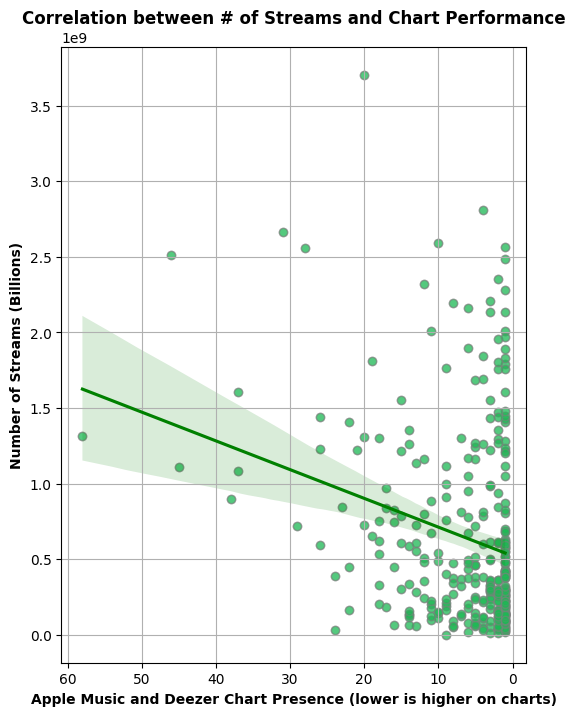

In [ ]:
# Streaming and Chart Performance - Do all music streaming services display the same number one song? (Jasmine)
# How does the number of streams on Spotify compare with songs' presence and ranking on other platforms such as Apple Music, Shazam, and Deezer ?
import seaborn as sns

data = spotify_data[['track_name', 'artist(s)_name', 'streams', 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']]
data = data.loc[(data.in_spotify_charts > 0) & (data.in_apple_charts > 0) & (data.in_deezer_charts > 0)]
data['apple_deezer_chart'] = np.minimum(data.in_apple_charts, data.in_deezer_charts)
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

fig, ax = plt.subplots(figsize = (6, 8))
ax.scatter(data.apple_deezer_chart, data.streams, alpha = 0.5, color = '#1DB954', edgecolor = 'gray')
sns.regplot(x = 'apple_deezer_chart', y = 'streams', data = data, scatter_kws = {'alpha' : 0.5, 'color' : '#1DB954', 'edgecolor' : 'gray'}, line_kws = {'color' : 'green'})

ax.set_xlabel("Apple Music and Deezer Chart Presence (lower is higher on charts)", weight = 'bold')
ax.set_ylabel("Number of Streams (Billions)", weight = 'bold')
ax.set_title("Correlation between # of Streams and Chart Performance", weight = 'bold')
ax.invert_xaxis()
ax.grid()


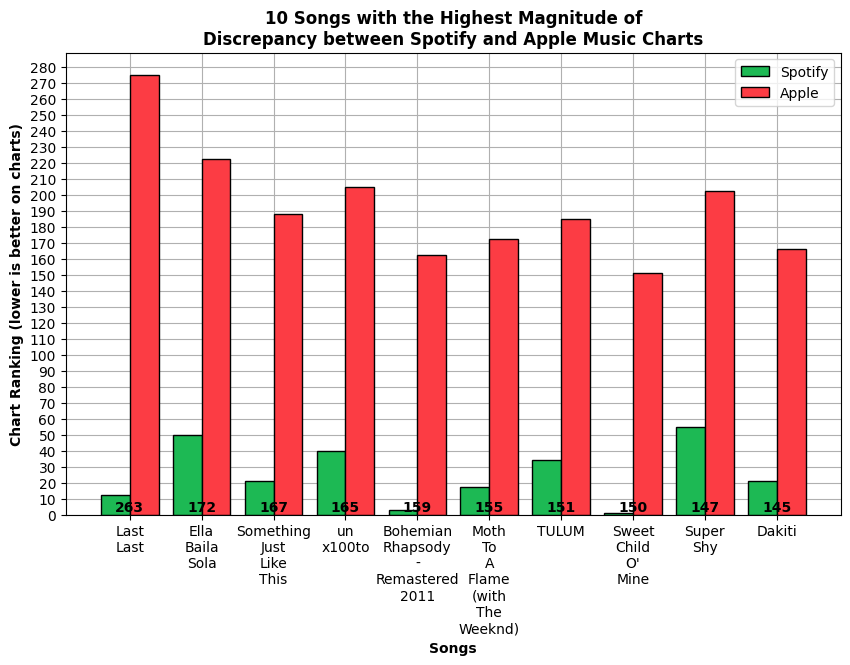

In [ ]:
data[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']] = data[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']].astype('int')
data['spotify_v_apple'] = abs(data.in_spotify_charts - data.in_apple_charts)
spot_app = data[['track_name', 'artist(s)_name', 'in_spotify_charts', 'in_apple_charts', 'spotify_v_apple']].sort_values(by='spotify_v_apple', ascending=False).head(10)

x_axis = np.arange(len(spot_app))
split_labels = ['\n'.join(label.split(' ')) for label in spot_app['track_name']]
plt.figure(figsize = (10, 6))
plt.bar(x_axis - 0.2, spot_app['in_spotify_charts'], 0.4, label='Spotify', edgecolor = 'black', color = '#1DB954')
plt.bar(x_axis + 0.2, spot_app['in_apple_charts'], 0.4, label='Apple', edgecolor = 'black', color = '#fc3c44')
for i, value in enumerate(spot_app['spotify_v_apple']):
    plt.text(x_axis[i], 0, f'{value}', ha = 'center', va = 'bottom', weight = 'bold')
plt.xticks(x_axis, split_labels)
plt.xlabel("Songs", weight = 'bold')
plt.ylabel("Chart Ranking (lower is better on charts)", weight = 'bold')
plt.title("10 Songs with the Highest Magnitude of\nDiscrepancy between Spotify and Apple Music Charts", weight = 'bold')
plt.gca().set_axisbelow(True)
plt.legend()
plt.yticks(np.arange(0, max(spot_app['in_spotify_charts'].max(), spot_app['in_apple_charts'].max()) + 10, 10))
plt.grid()


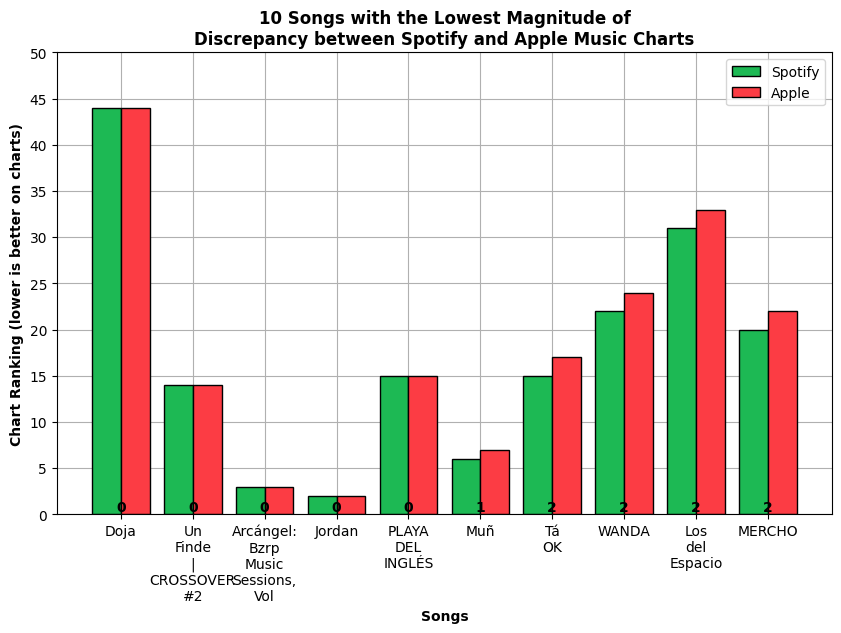

In [ ]:
data[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']] = data[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']].astype('int')
data['spotify_v_apple'] = abs(data.in_spotify_charts - data.in_apple_charts)
spot_app = data[['track_name', 'artist(s)_name', 'in_spotify_charts', 'in_apple_charts', 'spotify_v_apple']].sort_values(by='spotify_v_apple', ascending=True).head(10)

x_axis = np.arange(len(spot_app))
split_labels = ['\n'.join(label.split(' ')) for label in spot_app['track_name']]
plt.figure(figsize = (10, 6))
plt.bar(x_axis - 0.2, spot_app['in_spotify_charts'], 0.4, label='Spotify', edgecolor = 'black', color = '#1DB954')
plt.bar(x_axis + 0.2, spot_app['in_apple_charts'], 0.4, label='Apple', edgecolor = 'black', color = '#fc3c44')
for i, value in enumerate(spot_app['spotify_v_apple']):
    plt.text(x_axis[i], 0, f'{value}', ha = 'center', va = 'bottom', weight = 'bold')
plt.xticks(x_axis, split_labels)
plt.xlabel("Songs", weight = 'bold')
plt.ylabel("Chart Ranking (lower is better on charts)", weight = 'bold')
plt.title("10 Songs with the Lowest Magnitude of\nDiscrepancy between Spotify and Apple Music Charts", weight = 'bold')
plt.gca().set_axisbelow(True)
plt.legend()
plt.yticks(np.arange(0, 51, 5))
plt.grid()


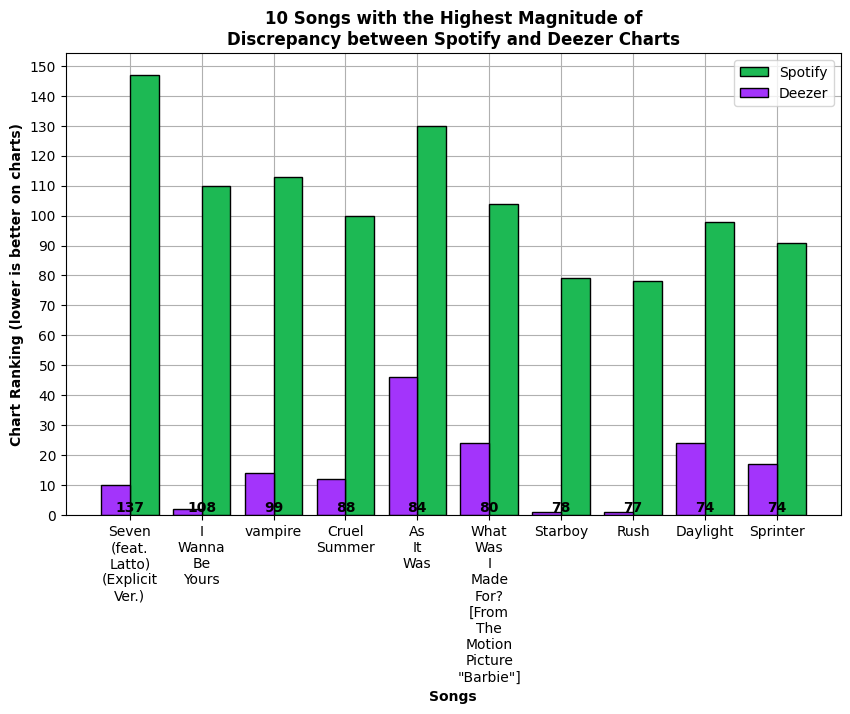

In [ ]:
data[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']] = data[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']].astype('int')
data['spotify_v_deezer'] = abs(data.in_spotify_charts - data.in_deezer_charts)
spot_deez = data[['track_name', 'artist(s)_name', 'in_spotify_charts', 'in_deezer_charts', 'spotify_v_deezer']].sort_values(by = 'spotify_v_deezer', ascending  = False).head(10)
x_axis = np.arange(len(spot_deez))

x_axis = np.arange(len(spot_deez))
split_labels = ['\n'.join(label.split(' ')) for label in spot_deez['track_name']]
plt.figure(figsize = (10, 6))
plt.bar(x_axis + 0.2, spot_deez['in_spotify_charts'], 0.4, label='Spotify', edgecolor = 'black', color = '#1DB954')
plt.bar(x_axis - 0.2, spot_deez['in_deezer_charts'], 0.4, label='Deezer', edgecolor = 'black', color = '#a334fb')
for i, value in enumerate(spot_deez['spotify_v_deezer']):
    plt.text(x_axis[i], 0, f'{value}', ha = 'center', va = 'bottom', weight = 'bold')
plt.xticks(x_axis, split_labels)
plt.xlabel("Songs", weight = 'bold')
plt.ylabel("Chart Ranking (lower is better on charts)", weight = 'bold')
plt.title("10 Songs with the Highest Magnitude of\nDiscrepancy between Spotify and Deezer Charts", weight = 'bold')
plt.gca().set_axisbelow(True)
plt.legend()
plt.yticks(np.arange(0, max(spot_deez['in_spotify_charts'].max(), spot_deez['in_deezer_charts'].max()) + 10, 10))
plt.grid()


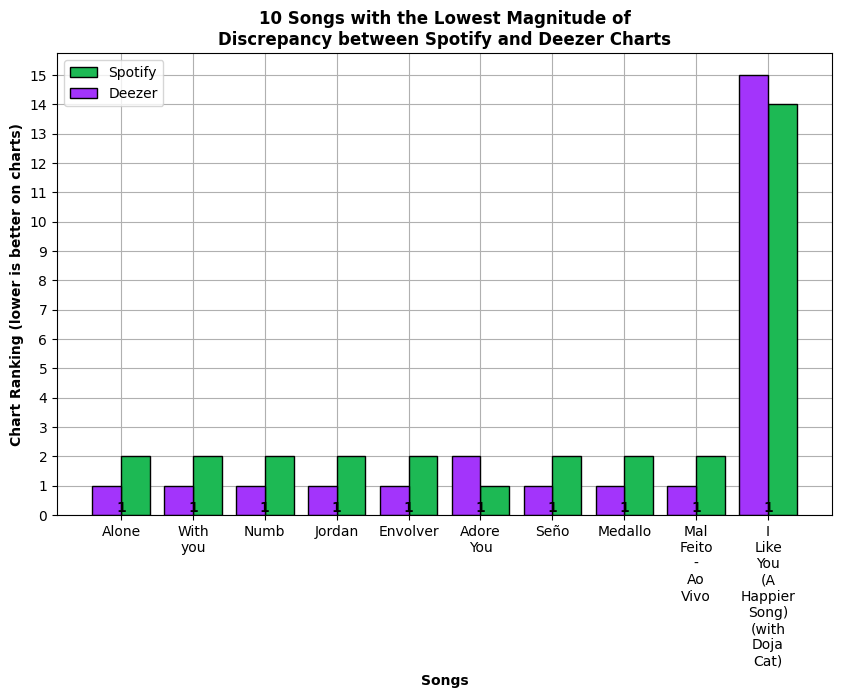

In [ ]:
data[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']] = data[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']].astype('int')
data['spotify_v_deezer'] = abs(data.in_spotify_charts - data.in_deezer_charts)
spot_deez = data[['track_name', 'artist(s)_name', 'in_spotify_charts', 'in_deezer_charts', 'spotify_v_deezer']].sort_values(by = 'spotify_v_deezer', ascending  = True).head(10)
x_axis = np.arange(len(spot_deez))

x_axis = np.arange(len(spot_deez))
split_labels = ['\n'.join(label.split(' ')) for label in spot_deez['track_name']]
plt.figure(figsize = (10, 6))
plt.bar(x_axis + 0.2, spot_deez['in_spotify_charts'], 0.4, label='Spotify', edgecolor = 'black', color = '#1DB954')
plt.bar(x_axis - 0.2, spot_deez['in_deezer_charts'], 0.4, label='Deezer', edgecolor = 'black', color = '#a334fb')
for i, value in enumerate(spot_deez['spotify_v_deezer']):
    plt.text(x_axis[i], 0, f'{value}', ha = 'center', va = 'bottom', weight = 'bold')
plt.xticks(x_axis, split_labels)
plt.xlabel("Songs", weight = 'bold')
plt.ylabel("Chart Ranking (lower is better on charts)", weight = 'bold')
plt.title("10 Songs with the Lowest Magnitude of\nDiscrepancy between Spotify and Deezer Charts", weight = 'bold')
plt.gca().set_axisbelow(True)
plt.legend()
plt.yticks(np.arange(0, 16, 1))
plt.grid()


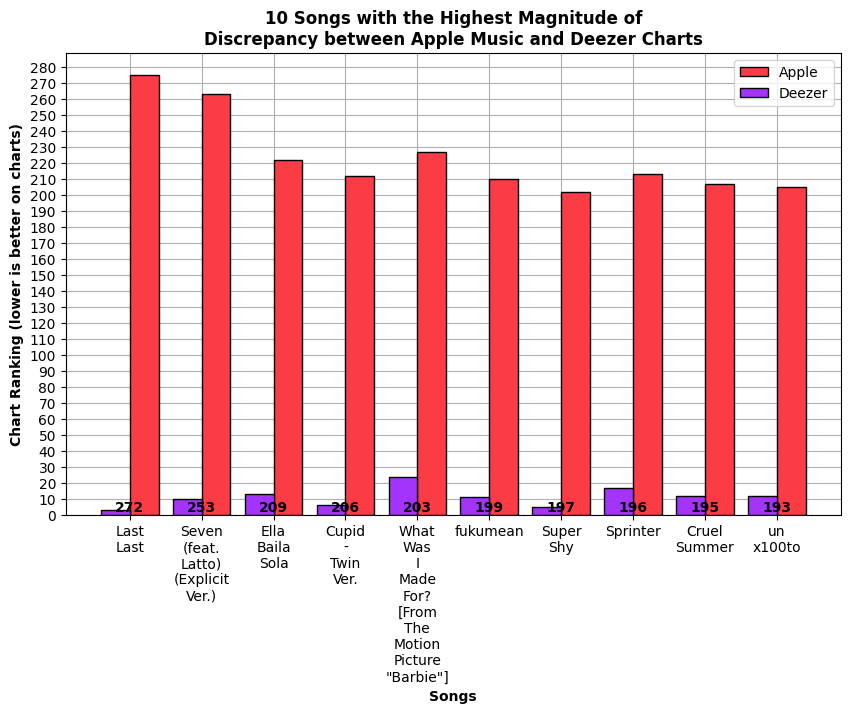

In [ ]:
data[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']] = data[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']].astype('int')
data['apple_v_deezer'] = abs(data.in_apple_charts - data.in_deezer_charts)
app_deez = data[['track_name', 'artist(s)_name', 'in_apple_charts', 'in_deezer_charts', 'apple_v_deezer']].sort_values(by = 'apple_v_deezer', ascending  = False).head(10)
x_axis = np.arange(len(spot_app))

split_labels = ['\n'.join(label.split(' ')) for label in app_deez['track_name']]
plt.figure(figsize = (10, 6))
plt.bar(x_axis + 0.2, app_deez['in_apple_charts'], 0.4, label='Apple', edgecolor = 'black', color = '#fc3c44')
plt.bar(x_axis - 0.2, app_deez['in_deezer_charts'], 0.4, label='Deezer', edgecolor = 'black', color = '#a334fb')

for i, value in enumerate(app_deez['apple_v_deezer']):
    plt.text(x_axis[i], 0, f'{value}', ha = 'center', va = 'bottom', weight = 'bold')
plt.xticks(x_axis, split_labels)
plt.xlabel("Songs", weight = 'bold')
plt.ylabel("Chart Ranking (lower is better on charts)", weight = 'bold')
plt.title("10 Songs with the Highest Magnitude of\nDiscrepancy between Apple Music and Deezer Charts", weight = 'bold')
plt.gca().set_axisbelow(True)
plt.legend()
plt.yticks(np.arange(0, max(app_deez['in_apple_charts'].max(), app_deez['in_deezer_charts'].max()) + 10, 10))
plt.grid()


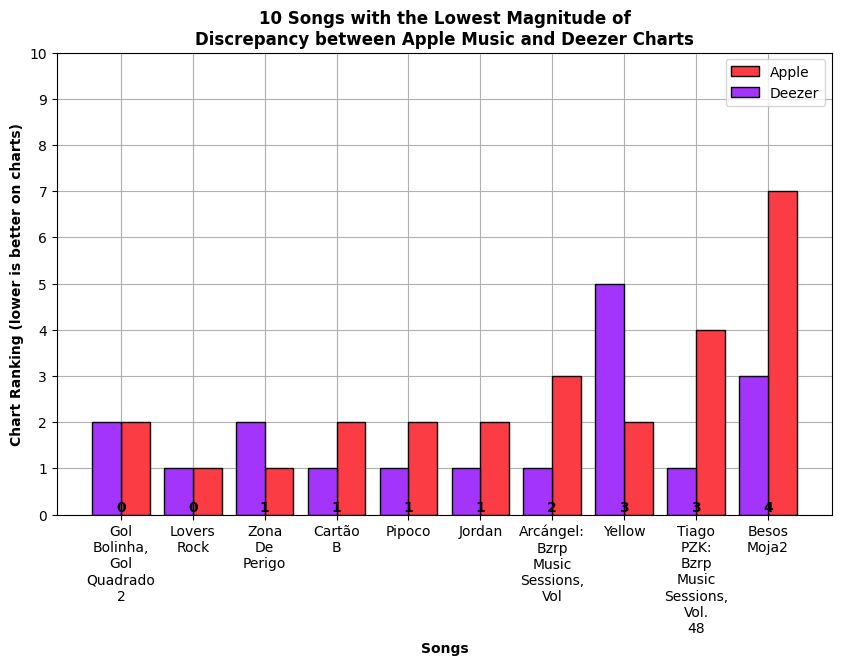

In [ ]:
data[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']] = data[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']].astype('int')
data['apple_v_deezer'] = abs(data.in_apple_charts - data.in_deezer_charts)
app_deez = data[['track_name', 'artist(s)_name', 'in_apple_charts', 'in_deezer_charts', 'apple_v_deezer']].sort_values(by = 'apple_v_deezer', ascending  = True).head(10)
x_axis = np.arange(len(spot_app))

split_labels = ['\n'.join(label.split(' ')) for label in app_deez['track_name']]
plt.figure(figsize = (10, 6))
plt.bar(x_axis + 0.2, app_deez['in_apple_charts'], 0.4, label='Apple', edgecolor = 'black', color = '#fc3c44')
plt.bar(x_axis - 0.2, app_deez['in_deezer_charts'], 0.4, label='Deezer', edgecolor = 'black', color = '#a334fb')

for i, value in enumerate(app_deez['apple_v_deezer']):
    plt.text(x_axis[i], 0, f'{value}', ha = 'center', va = 'bottom', weight = 'bold')
plt.xticks(x_axis, split_labels)
plt.xlabel("Songs", weight = 'bold')
plt.ylabel("Chart Ranking (lower is better on charts)", weight = 'bold')
plt.title("10 Songs with the Lowest Magnitude of\nDiscrepancy between Apple Music and Deezer Charts", weight = 'bold')
plt.gca().set_axisbelow(True)
plt.legend()
plt.yticks(np.arange(0, 11, 1))
plt.grid()


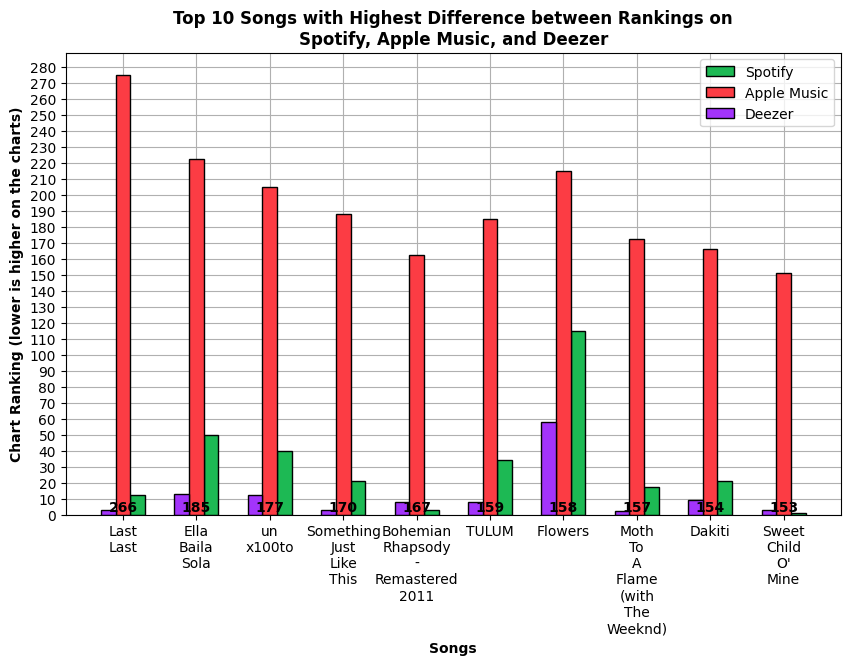

In [ ]:
data['spotify_v_apple_v_deezer'] = abs(data.in_spotify_charts - data.in_apple_charts - data.in_deezer_charts)
spot_app_deez = data[['track_name', 'artist(s)_name', 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'spotify_v_apple_v_deezer']].sort_values(by='spotify_v_apple_v_deezer', ascending=False).head(10)
x_axis = np.arange(len(spot_app_deez))

split_labels = ['\n'.join(label.split(' ')) for label in spot_app_deez['track_name']]
plt.figure(figsize=(10, 6))
plt.bar(x_axis + 0.2, spot_app_deez['in_spotify_charts'], 0.2, label='Spotify', edgecolor='black', color='#1DB954')
plt.bar(x_axis, spot_app_deez['in_apple_charts'], 0.2, label='Apple Music', edgecolor='black', color='#fc3c44')
plt.bar(x_axis - 0.2, spot_app_deez['in_deezer_charts'], 0.2, label='Deezer', edgecolor='black', color='#a334fb')
for i, value in enumerate(spot_app_deez['spotify_v_apple_v_deezer']):
    plt.text(x_axis[i], 0, f'{value}', ha='center', va='bottom', weight='bold')
plt.xticks(x_axis, split_labels)  # Rotate the x-axis labels for better readability
plt.xlabel("Songs", weight='bold')
plt.ylabel("Chart Ranking (lower is higher on the charts)", weight='bold')
plt.title("Top 10 Songs with Highest Difference between Rankings on\nSpotify, Apple Music, and Deezer", weight='bold')
plt.gca().set_axisbelow(True)
plt.legend()
plt.yticks(np.arange(0, max(spot_app_deez['in_spotify_charts'].max(), spot_app_deez['in_apple_charts'].max(), spot_app_deez['in_deezer_charts'].max()) + 10, 10))
plt.grid()



### Characteristics of Top Songs

### Tops Songs (Ranking - weekly, monthly streams and clicks) VS Most Streamed Songs (total stream time over the year)

#Q2 Tops Songs (Ranking - weekly, monthly streams and clicks) VS Most Streamed Songs (total stream time over the year)
What musical characteristics are mostly shared among top streamed songs, how does that compare with musical characteristics of top ranking songs? Are top songs also most streamed songs?


In [ ]:
name_only_top_five_streamed_songs = set(spotify_data.sort_values(by='streams', ascending=False).head(5)['track_name'].str.lower().reset_index(drop=True))

name_only_top_five_spotify_songs = set(spotify_data.sort_values(by='in_spotify_playlists', ascending=False).head(5)['track_name'].str.lower().reset_index(drop=True))

name_only_top_five_spotify_charts = set(spotify_data.sort_values(by='in_spotify_charts', ascending=False).head(5)['track_name'].str.lower().reset_index(drop=True))

name_only_top_five_apple_songs = set(spotify_data.sort_values(by='in_apple_playlists', ascending=False).head(5)['track_name'].str.lower().reset_index(drop=True))

name_only_top_five_apple_charts = set(spotify_data.sort_values(by='in_apple_charts', ascending=False).head(5)['track_name'].str.lower().reset_index(drop=True))

spotify_data['in_deezer_playlists'] = pd.to_numeric(spotify_data['in_deezer_playlists'], errors='coerce', downcast='integer')
name_only_top_five_deezer_songs = set(spotify_data.sort_values(by='in_deezer_playlists', ascending=False).head(5)['track_name'].str.lower().reset_index(drop=True))

name_only_top_five_deezer_charts = set(spotify_data.sort_values(by='in_deezer_charts', ascending=False).head(5)['track_name'].str.lower().reset_index(drop=True))

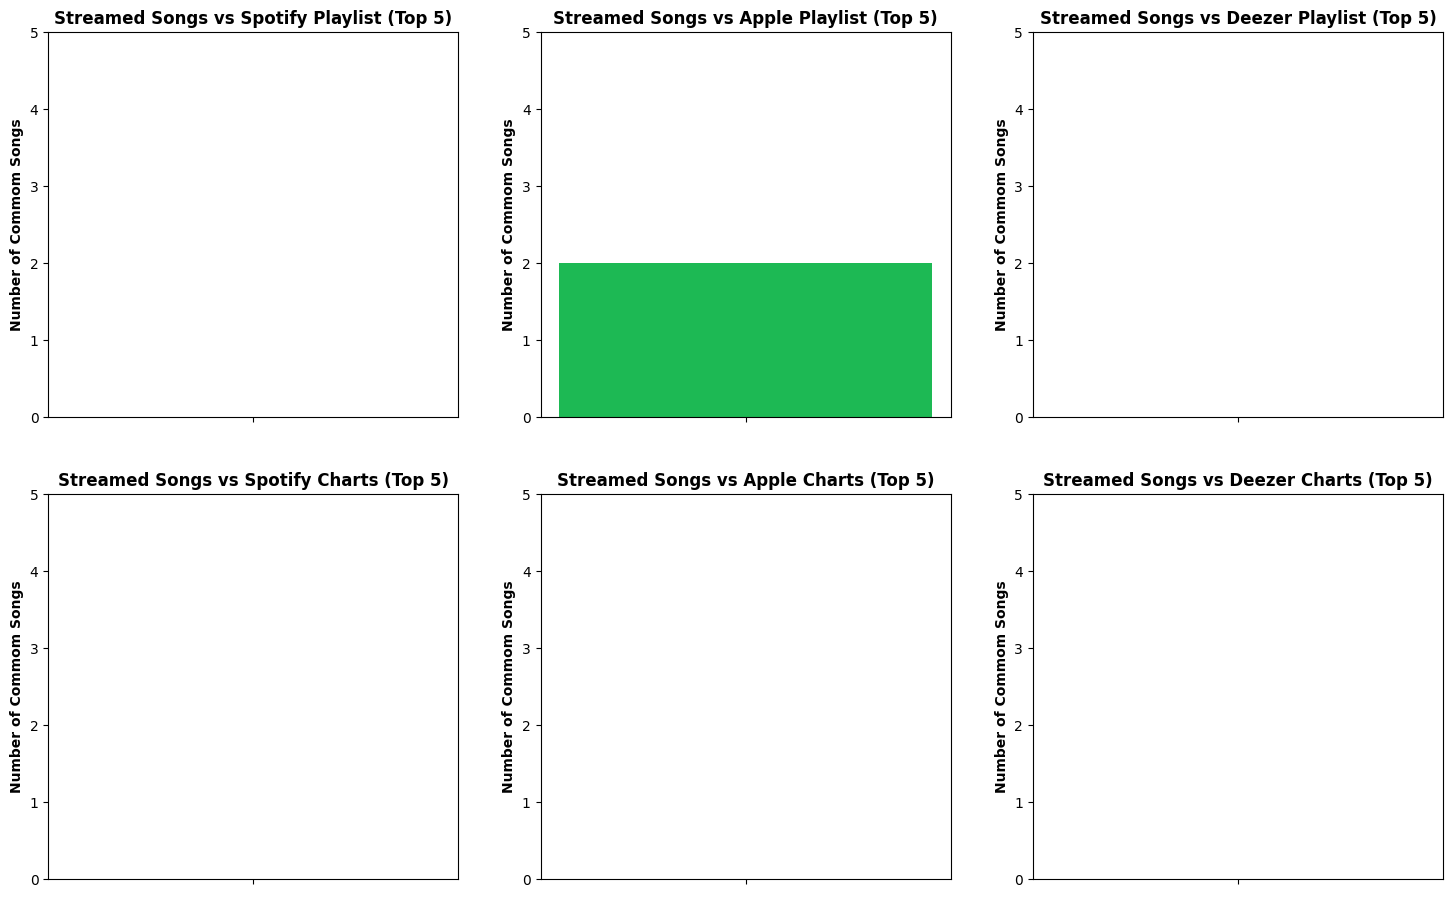

In [ ]:
fig = plt.figure(figsize=(18, 11))

fig.add_subplot(2,3,1)
streamed_songs_vs_spotify_songs = len(name_only_top_five_streamed_songs.intersection(name_only_top_five_spotify_songs))
plt.bar([""], [streamed_songs_vs_spotify_songs], color='#1DB954')
plt.ylabel('Number of Commom Songs', weight='bold')
plt.title('Streamed Songs vs Spotify Playlist (Top 5)', weight='bold')
plt.ylim(0, 5)

fig.add_subplot(2,3,4)
streamed_songs_vs_spotify_charts = len(name_only_top_five_streamed_songs.intersection(name_only_top_five_spotify_charts))
plt.bar([""], [streamed_songs_vs_spotify_charts], color='#1DB954')
plt.ylabel('Number of Commom Songs', weight='bold')
plt.title('Streamed Songs vs Spotify Charts (Top 5)', weight='bold')
plt.ylim(0, 5)

fig.add_subplot(2,3,2)
streamed_songs_vs_apple_songs = len(name_only_top_five_streamed_songs.intersection(name_only_top_five_apple_songs))
plt.bar([""], [streamed_songs_vs_apple_songs], color='#1DB954')
plt.ylabel('Number of Commom Songs', weight='bold')
plt.title('Streamed Songs vs Apple Playlist (Top 5)', weight='bold')
plt.ylim(0, 5)

fig.add_subplot(2,3,5)
streamed_songs_vs_apple_charts = len(name_only_top_five_streamed_songs.intersection(name_only_top_five_apple_charts))
plt.bar([""], [streamed_songs_vs_apple_charts], color='#1DB954')
plt.ylabel('Number of Commom Songs', weight='bold')
plt.title('Streamed Songs vs Apple Charts (Top 5)', weight='bold')
plt.ylim(0, 5)

fig.add_subplot(2,3,3)
streamed_songs_vs_deezer_songs = len(name_only_top_five_streamed_songs.intersection(name_only_top_five_deezer_songs))
plt.bar([""], [streamed_songs_vs_deezer_songs], color='#1DB954')
plt.ylabel('Number of Commom Songs', weight='bold')
plt.title('Streamed Songs vs Deezer Playlist (Top 5)', weight='bold')
plt.ylim(0, 5)

fig.add_subplot(2,3,6)
streamed_songs_vs_deezer_charts = len(name_only_top_five_streamed_songs.intersection(name_only_top_five_deezer_charts))
plt.bar([""], [streamed_songs_vs_deezer_charts], color='#1DB954')
plt.ylabel('Number of Commom Songs', weight='bold')
plt.title('Streamed Songs vs Deezer Charts (Top 5)', weight='bold')
plt.ylim(0, 5)

pass

In [ ]:
top_five_streamed_songs = spotify_data.sort_values(by='streams', ascending=False).head(5)
top_five_spotify_songs = spotify_data.sort_values(by='in_spotify_playlists', ascending=False).head(5)
top_five_spotify_charts = spotify_data.sort_values(by='in_spotify_charts', ascending=False).head(5)

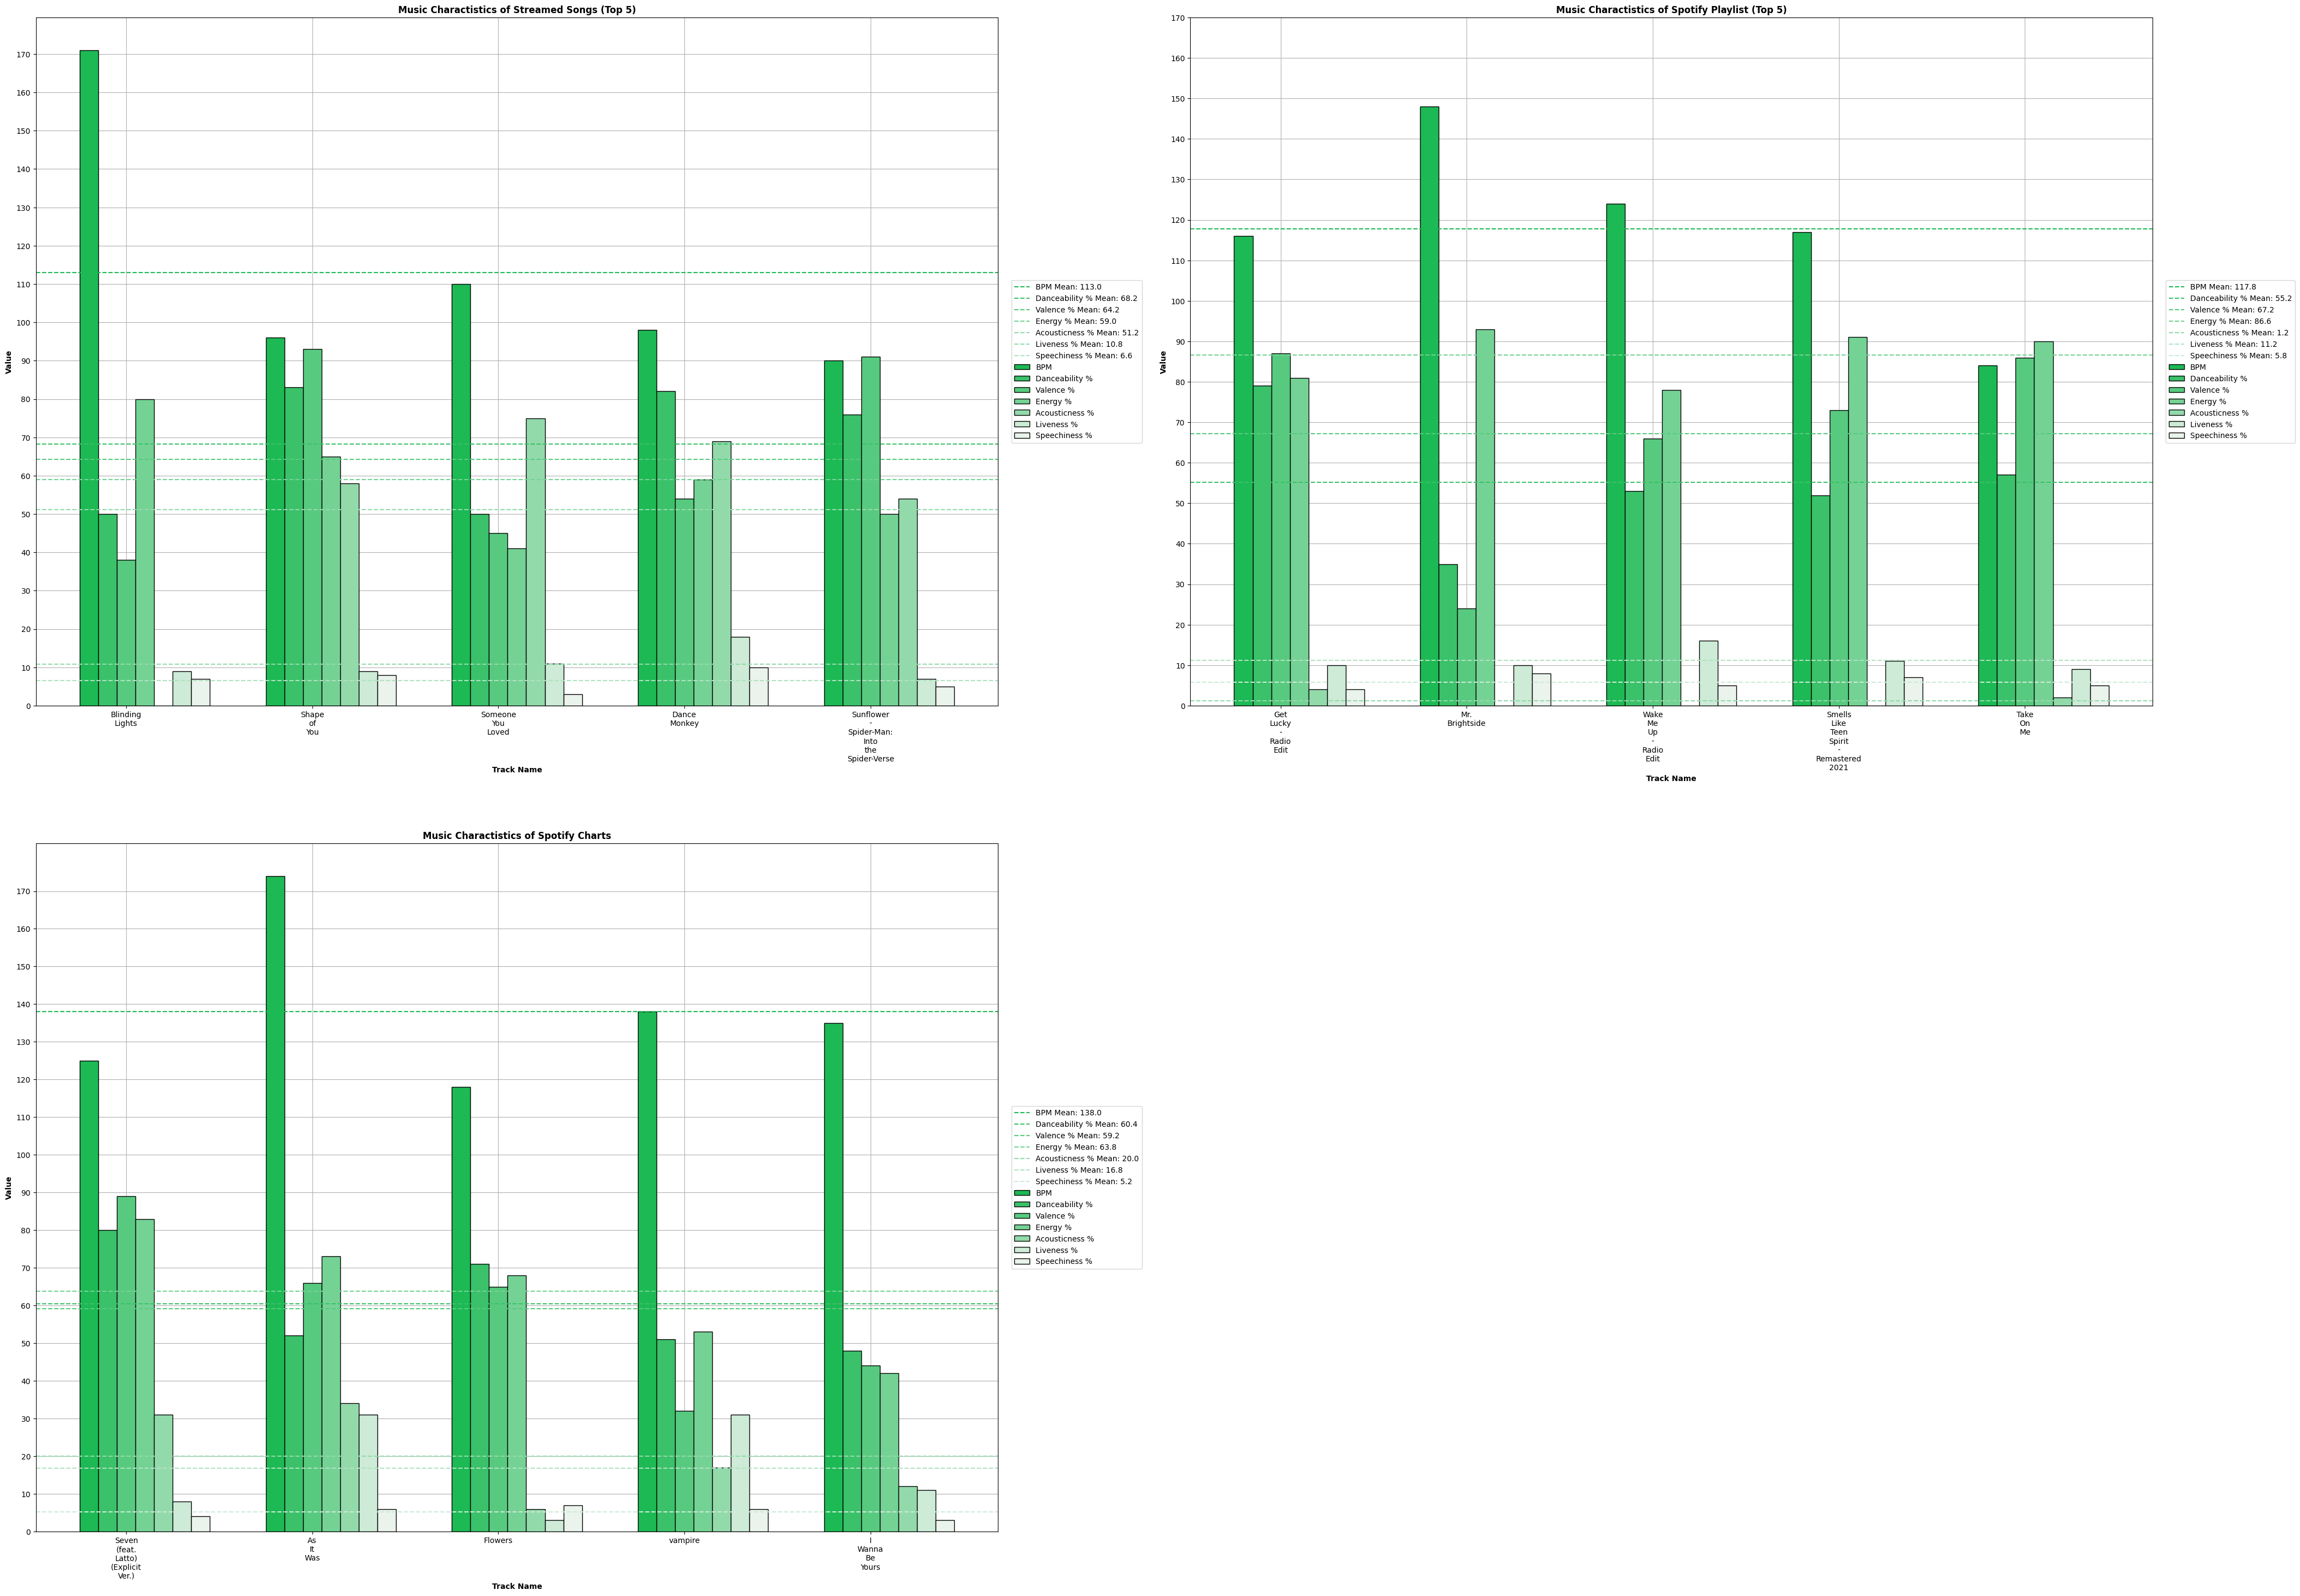

In [ ]:
import numpy as np
import seaborn as sns

track_names = top_five_streamed_songs['track_name']
bpm = top_five_streamed_songs['bpm']
danceability = top_five_streamed_songs['danceability_%']
valence = top_five_streamed_songs['valence_%']
energy = top_five_streamed_songs['energy_%']
acousticness = top_five_streamed_songs['acousticness_%']
#instrumental = top_five_streamed_songs['instrumentalness_%']
liveness = top_five_streamed_songs['liveness_%']
speechiness = top_five_streamed_songs['speechiness_%']

bpm_mean = bpm.mean()
danceability_mean = danceability.mean()
valence_mean = valence.mean()
energy_mean = energy.mean()
acousticness_mean = acousticness.mean()
#instrumental_mean = instrumental.mean()
liveness_mean = liveness.mean()
speechiness_mean = speechiness.mean()

bar_width = 0.1
index = np.arange(len(track_names))

base_color = "#1DB954"

spotify_gradient = sns.light_palette(base_color, n_colors=8, reverse=True)

fig = plt.figure(figsize=(50, 36))

fig.add_subplot(2,2,1)
plt.bar(index - 2 * bar_width, bpm, width=bar_width, label='BPM', color=spotify_gradient[0], edgecolor = 'black')
plt.bar(index - bar_width, danceability, width=bar_width, label='Danceability %', color=spotify_gradient[1], edgecolor = 'black')
plt.bar(index, valence, width=bar_width, label='Valence %', color=spotify_gradient[2], edgecolor = 'black')
plt.bar(index + bar_width, energy, width=bar_width, label='Energy %', color=spotify_gradient[3], edgecolor = 'black')
plt.bar(index + 2 * bar_width, acousticness, width=bar_width, label='Acousticness %', color=spotify_gradient[4], edgecolor = 'black')
#plt.bar(index + 3 * bar_width, instrumental, width=bar_width, label='Instrumental %', color=spotify_gradient[5], edgecolor = 'black')
plt.bar(index + 3 * bar_width, liveness, width=bar_width, label='Liveness %', color=spotify_gradient[6], edgecolor = 'black')
plt.bar(index + 4 * bar_width, speechiness, width=bar_width, label='Speechiness %', color=spotify_gradient[7], edgecolor = 'black')

plt.axhline(y=bpm_mean, color=spotify_gradient[0], linestyle='--', label=f'BPM Mean: {bpm_mean}')
plt.axhline(y=danceability_mean, color=spotify_gradient[1], linestyle='--', label=f'Danceability % Mean: {danceability_mean}')
plt.axhline(y=valence_mean, color=spotify_gradient[2], linestyle='--', label=f'Valence % Mean: {valence_mean}')
plt.axhline(y=energy_mean, color=spotify_gradient[3], linestyle='--', label=f'Energy % Mean: {energy_mean}')
plt.axhline(y=acousticness_mean, color=spotify_gradient[4], linestyle='--', label=f'Acousticness % Mean: {acousticness_mean}')
#plt.axhline(y=instrumental_mean, color=spotify_gradient[5], linestyle='--', label=f'Instrumental % Mean: {instrumental_mean}')
plt.axhline(y=liveness_mean, color=spotify_gradient[4], linestyle='--', label=f'Liveness % Mean: {liveness_mean}')
plt.axhline(y=speechiness_mean, color=spotify_gradient[5], linestyle='--', label=f'Speechiness % Mean: {speechiness_mean}')

split_labels = ['\n'.join(i.split(' ')) for i in track_names]
plt.title('Music Charactistics of Streamed Songs (Top 5)', weight='bold')
plt.xlabel('Track Name', weight='bold')
plt.ylabel('Value', weight='bold')
plt.xticks(index, split_labels)
plt.gca().set_axisbelow(True)
plt.yticks(np.arange(0, 170 + 10, 10))
plt.grid()
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left')

track_names = top_five_spotify_songs['track_name']
bpm = top_five_spotify_songs['bpm']
danceability = top_five_spotify_songs['danceability_%']
valence = top_five_spotify_songs['valence_%']
energy = top_five_spotify_songs['energy_%']
acousticness = top_five_spotify_songs['acousticness_%']
#instrumental = top_five_spotify_songs['instrumentalness_%']
liveness = top_five_spotify_songs['liveness_%']
speechiness = top_five_spotify_songs['speechiness_%']

bpm_mean = bpm.mean()
danceability_mean = danceability.mean()
valence_mean = valence.mean()
energy_mean = energy.mean()
acousticness_mean = acousticness.mean()
#instrumental_mean = instrumental.mean()
liveness_mean = liveness.mean()
speechiness_mean = speechiness.mean()

fig.add_subplot(2,2,2)
plt.bar(index - 2 * bar_width, bpm, width=bar_width, label='BPM', color=spotify_gradient[0], edgecolor = 'black')
plt.bar(index - bar_width, danceability, width=bar_width, label='Danceability %', color=spotify_gradient[1], edgecolor = 'black')
plt.bar(index, valence, width=bar_width, label='Valence %', color=spotify_gradient[2], edgecolor = 'black')
plt.bar(index + bar_width, energy, width=bar_width, label='Energy %', color=spotify_gradient[3], edgecolor = 'black')
plt.bar(index + 2 * bar_width, acousticness, width=bar_width, label='Acousticness %', color=spotify_gradient[4], edgecolor = 'black')
#plt.bar(index + 3 * bar_width, instrumental, width=bar_width, label='Instrumental %', color=spotify_gradient[5], edgecolor = 'black')
plt.bar(index + 3 * bar_width, liveness, width=bar_width, label='Liveness %', color=spotify_gradient[6], edgecolor = 'black')
plt.bar(index + 4 * bar_width, speechiness, width=bar_width, label='Speechiness %', color=spotify_gradient[7], edgecolor = 'black')

plt.axhline(y=bpm_mean, color=spotify_gradient[0], linestyle='--', label=f'BPM Mean: {bpm_mean}')
plt.axhline(y=danceability_mean, color=spotify_gradient[1], linestyle='--', label=f'Danceability % Mean: {danceability_mean}')
plt.axhline(y=valence_mean, color=spotify_gradient[2], linestyle='--', label=f'Valence % Mean: {valence_mean}')
plt.axhline(y=energy_mean, color=spotify_gradient[3], linestyle='--', label=f'Energy % Mean: {energy_mean}')
plt.axhline(y=acousticness_mean, color=spotify_gradient[4], linestyle='--', label=f'Acousticness % Mean: {acousticness_mean}')
#plt.axhline(y=instrumental_mean, color=spotify_gradient[5], linestyle='--', label=f'Instrumental % Mean: {instrumental_mean}')
plt.axhline(y=liveness_mean, color=spotify_gradient[5], linestyle='--', label=f'Liveness % Mean: {liveness_mean}')
plt.axhline(y=speechiness_mean, color=spotify_gradient[6], linestyle='--', label=f'Speechiness % Mean: {speechiness_mean}')

split_labels = ['\n'.join(i.split(' ')) for i in track_names]
plt.title('Music Charactistics of Spotify Playlist (Top 5)', weight='bold')
plt.xlabel('Track Name', weight='bold')
plt.ylabel('Value', weight='bold')
plt.xticks(index, split_labels)
plt.gca().set_axisbelow(True)
plt.yticks(np.arange(0, 170 + 10, 10))
plt.grid()
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left')

track_names = top_five_spotify_charts['track_name']
bpm = top_five_spotify_charts['bpm']
danceability = top_five_spotify_charts['danceability_%']
valence = top_five_spotify_charts['valence_%']
energy = top_five_spotify_charts['energy_%']
acousticness = top_five_spotify_charts['acousticness_%']
#instrumental = top_five_spotify_charts['instrumentalness_%']
liveness = top_five_spotify_charts['liveness_%']
speechiness = top_five_spotify_charts['speechiness_%']

bpm_mean = bpm.mean()
danceability_mean = danceability.mean()
valence_mean = valence.mean()
energy_mean = energy.mean()
acousticness_mean = acousticness.mean()
#instrumental_mean = instrumental.mean()
liveness_mean = liveness.mean()
speechiness_mean = speechiness.mean()

fig.add_subplot(2,2,3)
plt.bar(index - 2 * bar_width, bpm, width=bar_width, label='BPM', color=spotify_gradient[0], edgecolor = 'black')
plt.bar(index - bar_width, danceability, width=bar_width, label='Danceability %', color=spotify_gradient[1], edgecolor = 'black')
plt.bar(index, valence, width=bar_width, label='Valence %', color=spotify_gradient[2], edgecolor = 'black')
plt.bar(index + bar_width, energy, width=bar_width, label='Energy %', color=spotify_gradient[3], edgecolor = 'black')
plt.bar(index + 2 * bar_width, acousticness, width=bar_width, label='Acousticness %', color=spotify_gradient[4], edgecolor = 'black')
#plt.bar(index + 3 * bar_width, instrumental, width=bar_width, label='Instrumental %', color=spotify_gradient[5], edgecolor = 'black')
plt.bar(index + 3 * bar_width, liveness, width=bar_width, label='Liveness %', color=spotify_gradient[6], edgecolor = 'black')
plt.bar(index + 4 * bar_width, speechiness, width=bar_width, label='Speechiness %', color=spotify_gradient[7], edgecolor = 'black')

plt.axhline(y=bpm_mean, color=spotify_gradient[0], linestyle='--', label=f'BPM Mean: {bpm_mean}')
plt.axhline(y=danceability_mean, color=spotify_gradient[1], linestyle='--', label=f'Danceability % Mean: {danceability_mean}')
plt.axhline(y=valence_mean, color=spotify_gradient[2], linestyle='--', label=f'Valence % Mean: {valence_mean}')
plt.axhline(y=energy_mean, color=spotify_gradient[3], linestyle='--', label=f'Energy % Mean: {energy_mean}')
plt.axhline(y=acousticness_mean, color=spotify_gradient[4], linestyle='--', label=f'Acousticness % Mean: {acousticness_mean}')
#plt.axhline(y=instrumental_mean, color=spotify_gradient[5], linestyle='--', label=f'Instrumental % Mean: {instrumental_mean}')
plt.axhline(y=liveness_mean, color=spotify_gradient[5], linestyle='--', label=f'Liveness % Mean: {liveness_mean}')
plt.axhline(y=speechiness_mean, color=spotify_gradient[6], linestyle='--', label=f'Speechiness % Mean: {speechiness_mean}')

split_labels = ['\n'.join(i.split(' ')) for i in track_names]
plt.title('Music Charactistics of Spotify Charts', weight='bold')
plt.xlabel('Track Name', weight='bold')
plt.ylabel('Value', weight='bold')
plt.xticks(index, split_labels)
plt.gca().set_axisbelow(True)
plt.yticks(np.arange(0, 170 + 10, 10))
plt.grid()
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left')

#Q3 Features of Top Songs
Do features ( BPM,perceived danceability, energy, and valence) of the song matter?


In [ ]:
# Check the data completeness of music features

# 'acousticness_%' and 'instrumentalness_%' contain 60,and 863 zeros, hence will be exluded from feature analysis due to data completeness issue.

features = ['bpm','energy_%','valence_%','danceability_%','acousticness_%','speechiness_%','instrumentalness_%','liveness_%']

features_zeros_count = {}

columns = column_names = spotify_data.columns.tolist()

for column in columns:

    features_zeros_count[column] = (spotify_data[column] == 0).sum()

print(f'Number of zeros in music features:\n {features_zeros_count}')

from IPython.display import display, Markdown
list_content = '\n'.join([f'{key}: {value}' for key, value in features_zeros_count.items()])
display(Markdown(list_content))


Number of zeros in music features:
 {'track_name': 0, 'artist(s)_name': 0, 'artist_count': 0, 'released_year': 0, 'released_month': 0, 'released_day': 0, 'in_spotify_playlists': 0, 'in_spotify_charts': 401, 'streams': 0, 'in_apple_playlists': 22, 'in_apple_charts': 97, 'in_deezer_playlists': 0, 'in_deezer_charts': 554, 'bpm': 0, 'key': 0, 'mode': 0, 'danceability_%': 0, 'valence_%': 0, 'energy_%': 0, 'acousticness_%': 60, 'liveness_%': 0, 'speechiness_%': 0, 'trackID': 0, 'key_mode': 0}


track_name: 0
artist(s)_name: 0
artist_count: 0
released_year: 0
released_month: 0
released_day: 0
in_spotify_playlists: 0
in_spotify_charts: 401
streams: 0
in_apple_playlists: 22
in_apple_charts: 97
in_deezer_playlists: 0
in_deezer_charts: 554
bpm: 0
key: 0
mode: 0
danceability_%: 0
valence_%: 0
energy_%: 0
acousticness_%: 60
liveness_%: 0
speechiness_%: 0
trackID: 0
key_mode: 0

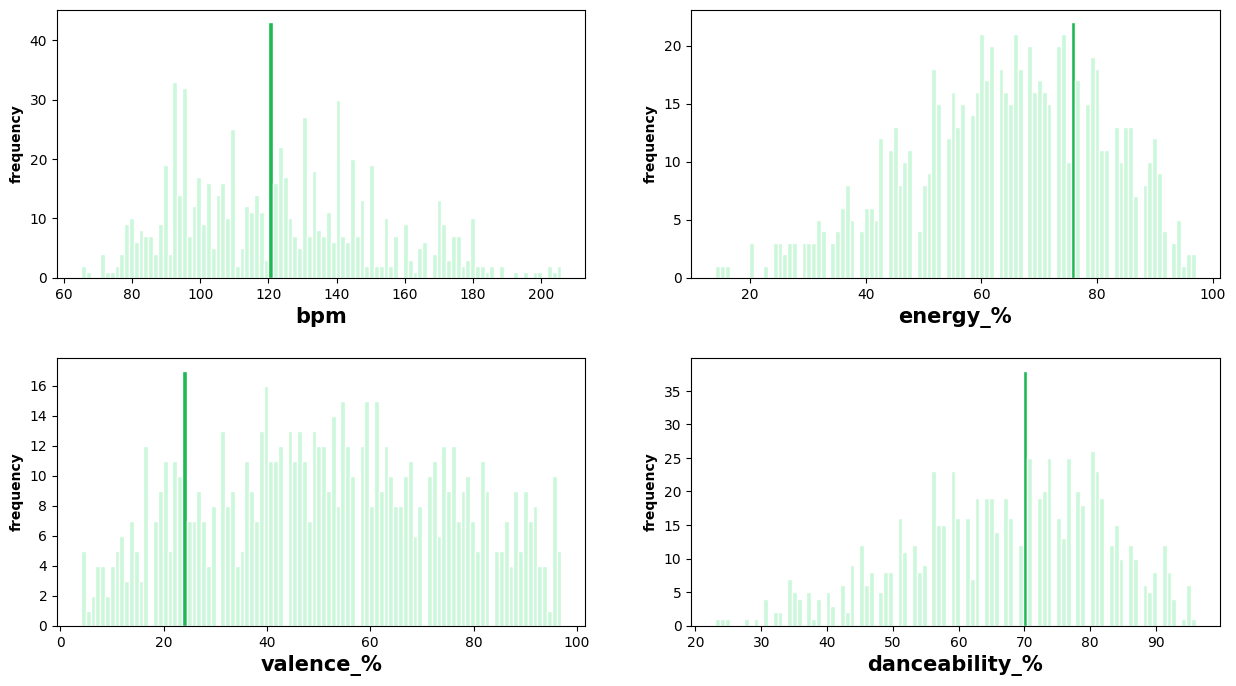

In [ ]:
#Filter all songs with over 100 million streams, there are in total 979 songs with over 100 million+ streams.
All_Year_Top = spotify_data[spotify_data['streams']>=100000000]
All_Year_Top.shape

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
plt.subplots_adjust(hspace = 0.3)

columns = ['bpm','energy_%','valence_%','danceability_%']
axes = axes.flatten()

for i, column in enumerate(columns):

    # Plot the histogram
    counts, edges, container= axes[i].hist(All_Year_Top[column], bins=100, color='#cbf7da', edgecolor='white')

    # Highlight the color of the highest bin (assuming 0-indexed)
    highest_bar_index = np.argmax(counts)
    container.patches[highest_bar_index].set_facecolor('#1DB954')

    # Set labels and title
    axes[i].set_xlabel(column, weight = 'bold',fontsize = 15)
    axes[i].set_ylabel('frequency', weight = 'bold')
    #axes[i].set_title('Histogram of '+column, weight = 'bold')

    #axes[i].grid(True)
    axes[i].set_axisbelow(True)

# Show the plot
plt.show()


In [ ]:
spotify_data[spotify_data['track_name']=='Counting Stars'].loc[:,['track_name','artist(s)_name','bpm','energy_%','valence_%','danceability_%','acousticness_%','speechiness_%','streams']]


,track_name,artist(s)_name,bpm,energy_%,valence_%,danceability_%,acousticness_%,speechiness_%,streams
157,Counting Stars,OneRepublic,122,71,48,66,6,4,2011464183


## Trend in Energy, Valence of over 100 million streams songs on Spotify

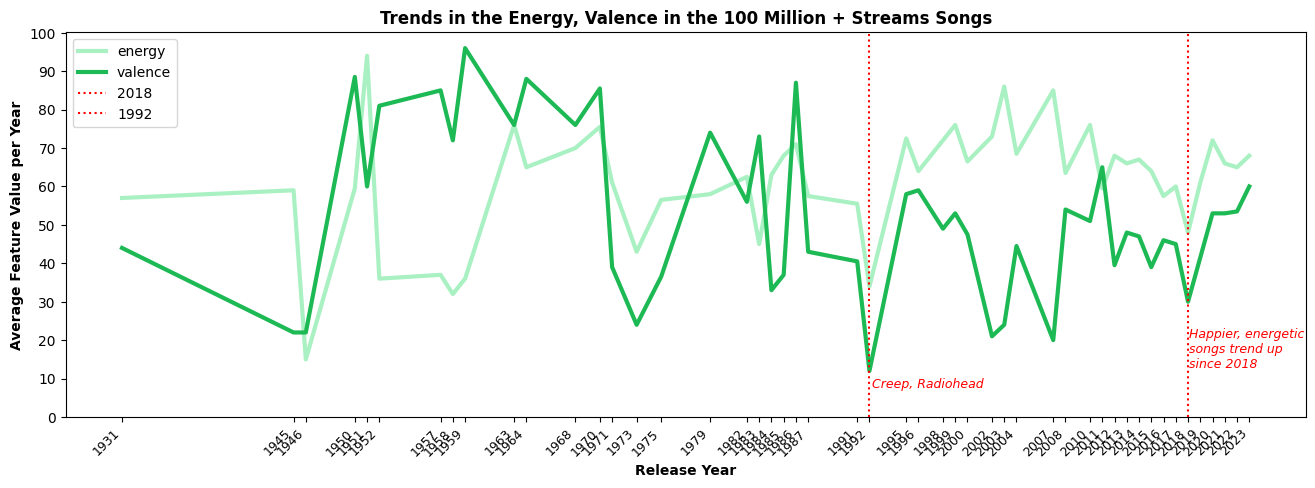

In [ ]:
#Aggregate all songs over 100 million streams (All_Year_Top), by release year and then take the median in energy and valence.
energy=  All_Year_Top.groupby('released_year')['energy_%'].median()
energy= energy.reset_index()
valence=  All_Year_Top.groupby('released_year')['valence_%'].median()
Mean_df = pd.merge(energy, valence,on = 'released_year', how = 'left')

# Set the figure size
plt.figure(figsize=(16, 5))

Mean_dfs = Mean_df.sort_values(by = 'released_year',ascending = True)

# Plotting the line chart energy and valence
plt.plot(Mean_dfs['released_year'] , Mean_dfs['energy_%'],label='energy',color = '#a9f1c2',linewidth = 3) #'10642e'
plt.plot(Mean_dfs['released_year']  , Mean_dfs['valence_%'],label='valence',color = '#1DB954',linewidth = 3)

# Adding plot title, axises labels
plt.xlabel("Release Year", weight = 'bold')
plt.ylabel("Average Feature Value per Year", weight = 'bold')
plt.title("Trends in the Energy, Valence in the 100 Million + Streams Songs", weight = 'bold')

# Formatting X axis dates
plt.xticks(Mean_dfs['released_year'], rotation=45, ha='right', fontsize = 9)

plt.axvline([2018],color = 'red',linestyle = ':',label = '2018')
#plt.axvline([2020],color = 'red',linestyle = ':',label = '2002')
plt.axvline([1992],color = 'red',linestyle = ':',label = '1992')
# Show legend
plt.legend(loc='upper left')

# Add observation to the chart
comment = "Happier, energetic"
plt.annotate(comment, xy=(0.743, 0.3), xycoords='figure fraction', ha='left', fontsize=9, color='red',fontstyle='italic')
comment = "songs trend up"
plt.annotate(comment, xy=(0.743, 0.27), xycoords='figure fraction', ha='left', fontsize=9, color='red',fontstyle='italic')
comment = "since 2018"
plt.annotate(comment, xy=(0.743, 0.24), xycoords='figure fraction', ha='left', fontsize=9, color='red',fontstyle='italic')
comment = "Creep, Radiohead"
plt.annotate(comment, xy=(0.58, 0.2), xycoords='figure fraction', ha='center', fontsize=9, color='red',fontstyle='italic')

#plt.grid()
plt.yticks(np.arange(0, 100 + 10, 10))


# Show the plot
plt.show()

## Music features trend of most streamed songs in 2019 -2023

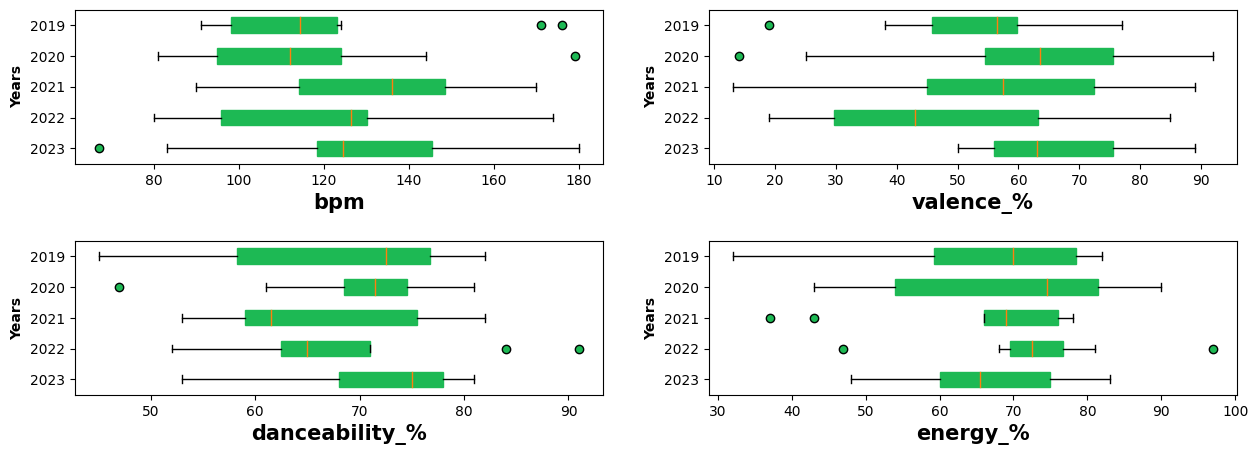

In [ ]:
# Aggregate all songs in the dataset by the release year and then rank all songs released within the same year based on their streams.
spotify_data['Rank'] = spotify_data.groupby('released_year')['streams'].rank(ascending = False, method = 'dense').astype(int)
spotify_data.sort_values(by = 'Rank',ascending = True)

# Filter the top 10 songs in 2019 -2023
Top_10_2019_23 =spotify_data[(spotify_data['Rank']<=10)&(spotify_data['released_year'].isin([2019,2020,2021,2022,2023]))]

# Create a boxplot
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,5))
plt.subplots_adjust(hspace = 0.5)

# We look at four features - bpm, valence, danceability, energy
columns = ['bpm','valence_%','danceability_%','energy_%']

#Iterate over columns using enumerate to get both index and column name
for i, column in enumerate(columns):

    # collect data for each year (2023,2022,201,2020,2019) for the current column
    data = [Top_10_2019_23[Top_10_2019_23['released_year'] == a][column].values for a in [2023,2022,2021,2020,2019]]

    #select the current subplot based on the index i. in a 2X2 grid of subplots.
    ax = axes[i // 2, i % 2]

    # Plot the histogram
    ax.boxplot(data,
                    vert=False,  # vertical box alignment
                    patch_artist=True,  # fill with color
                    labels=[2023,2022,2021,2020,2019],  # will be used to label x-ticks
                    boxprops = dict(facecolor='#1DB954', color='#1DB954'),
                    flierprops=dict(markerfacecolor='#1DB954', marker='o', markersize=6))  # Set flierprops for outliers)

  #  ax.set_title(f'Boxplot of {column} for Top 10 in 2021-2023', weight = 'bold')
    ax.set_xlabel(column, weight = 'bold', fontsize = 15)
    ax.set_ylabel('Years', weight = 'bold')
    #ax.grid(True)

#show the plot
plt.show()

#Q4 Artist Collaboration
How does artist collaboration impact the streamings of a song with a focus on determining if solo artist or collaboration between artists are more prevalent in charts and playlist, and what is the average number of contributing artists in the most streamed songs? Given the artist count and characteristics of top songs, which artist should be selected for collaboration to maximize song appeal and potential for streaming success?


In [ ]:
print(spotify_data['artist_count'].dtypes)
print(spotify_data['streams'].dtypes)

int64
int64


Text(0, 0.5, 'Average Artist Count')

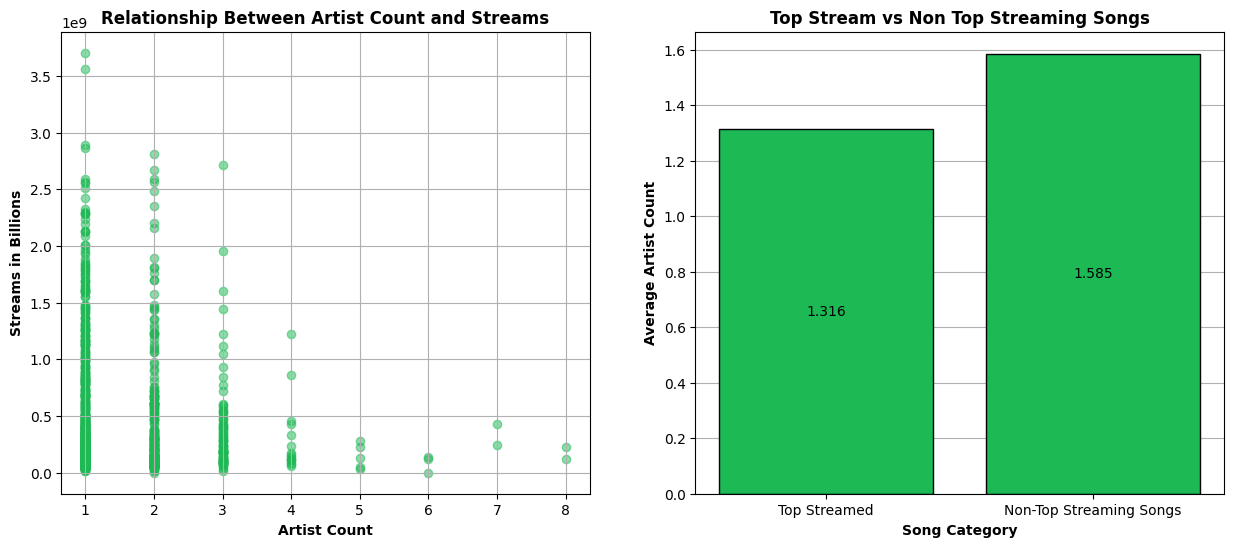

In [ ]:
# coverting steams to numberic value to plot graph
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')

top_10_perc = spotify_data['streams'].quantile(.90)
top_streamed_song = spotify_data[spotify_data['streams'] >= top_10_perc]

#get the average artist count based on top stream
top_avg_artist_count = top_streamed_song['artist_count'].mean()
avg_artist_count = spotify_data[spotify_data['streams'] < top_10_perc]['artist_count'].mean()

# ploting graph to display results:

fig, axs = plt.subplots(1, 2, figsize=(15,6))

axs[0].scatter(spotify_data['artist_count'], spotify_data['streams'], alpha=0.5, color='#1DB954')
axs[0].grid()
axs[0].set_title('Relationship Between Artist Count and Streams', weight = 'bold')
axs[0].set_xlabel('Artist Count', weight = 'bold')
axs[0].set_ylabel('Streams in Billions', weight = 'bold')


bars = axs[1].bar(['Top Streamed', 'Non-Top Streaming Songs'], [top_avg_artist_count, avg_artist_count], color = '#1DB954', edgecolor = 'black')
axs[1].bar_label(bars, fmt='%.3f', label_type ='center')
axs[1].set_axisbelow(True)
axs[1].grid(axis='y')
axs[1].set_title('Top Stream vs Non Top Streaming Songs', weight = 'bold')
axs[1].set_xlabel('Song Category', weight = 'bold')
axs[1].set_ylabel('Average Artist Count', weight = 'bold')





Text(95.72222222222221, 0.5, 'Artist Count')

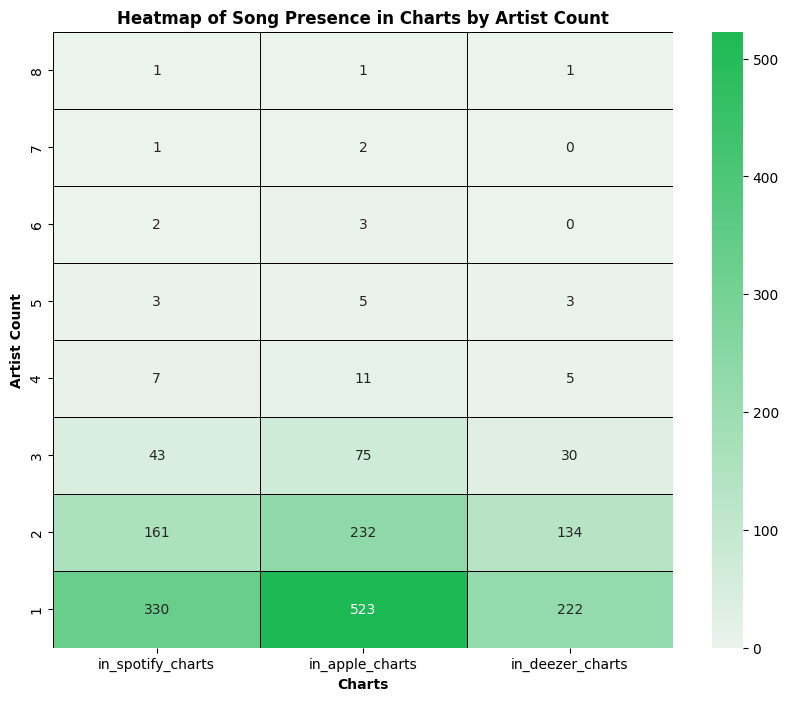

In [ ]:
# determining if artist count will contribute to chart placement on different music streaming platform
spotify_data['in_spotify_charts'] = spotify_data['in_spotify_charts'].apply(lambda x: 1 if x else 0)
spotify_data['in_apple_charts'] = spotify_data['in_apple_charts'].apply(lambda x: 1 if x else 0)
spotify_data['in_deezer_charts'] = spotify_data['in_deezer_charts'].apply(lambda x: 1 if x else 0)

heatmap_data = spotify_data.groupby('artist_count')[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']].sum()

# creating a heatmap
plt.figure(figsize=(10, 8))
cmap = sns.light_palette("#1DB954", as_cmap=True)
ax = sns.heatmap(heatmap_data, annot=True, fmt='d', cmap=cmap, linewidths=0.5, linecolor='black')

ax.invert_yaxis()

plt.title('Heatmap of Song Presence in Charts by Artist Count', weight = 'bold')
plt.xlabel('Charts', weight = 'bold')
plt.ylabel('Artist Count', weight = 'bold')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# filtering data for artist_count = 1
artist_count1 = spotify_data[spotify_data['artist_count'] == 1]
artist_count1.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%,trackID,key_mode,Rank
1,LALA,Myke Towers,1,2023,3,23,1474,1,133716286,48,1,58,1,92,C#,Major,71,61,74,7,10,4,LALAMyke Towers,C#Major,66
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,1,140003974,94,1,91,1,138,F,Major,51,32,53,17,31,6,vampireOlivia Rodrigo,FMajor,61
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,1,800840817,116,1,125,1,170,A,Major,55,58,72,11,11,15,Cruel SummerTaylor Swift,AMajor,19
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,1,303236322,84,1,87,1,144,A,Minor,65,23,80,14,11,6,WHERE SHE GOESBad Bunny,AMinor,18
7,Columbia,Quevedo,1,2023,7,7,714,1,58149378,25,1,30,1,100,F,Major,67,26,71,37,11,4,ColumbiaQuevedo,FMajor,135


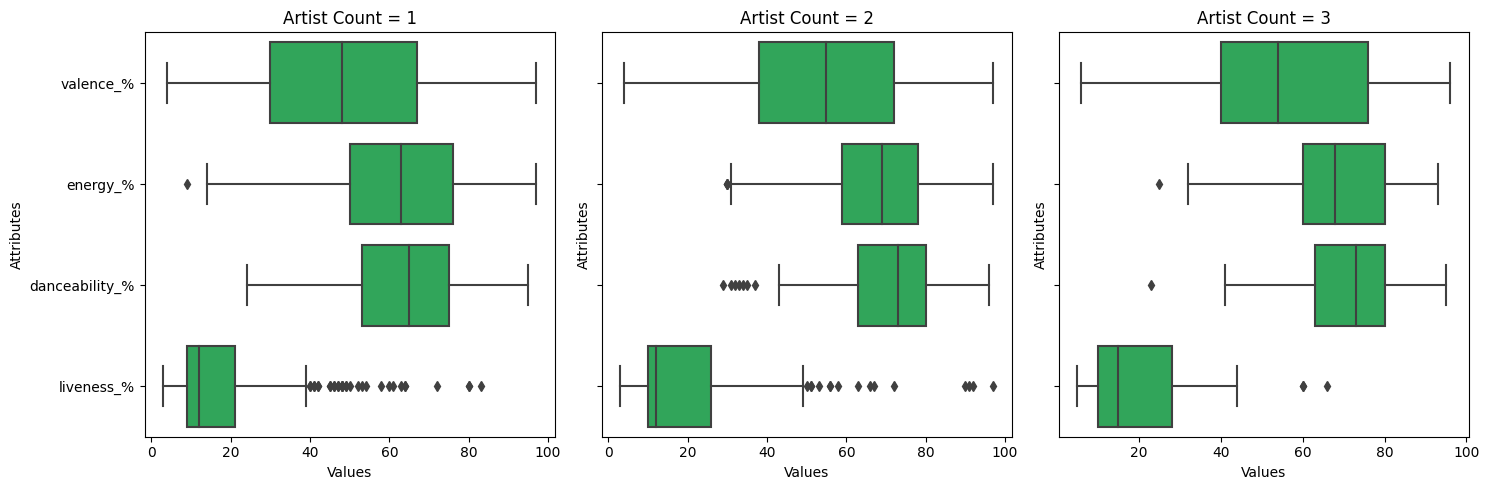

In [ ]:
# looking at artist counts and their song characteristic
attributes = ['valence_%', 'energy_%', 'danceability_%', 'liveness_%']
artist_counts = [1, 2, 3]

fig, axes = plt.subplots(1, len(artist_counts), figsize=(15, 5), sharey=True)

for i, artist_count in enumerate(artist_counts):

    data = spotify_data[spotify_data['artist_count'] == artist_count]
    plot_data = pd.melt(data, value_vars=attributes, var_name='Attributes', value_name='Values')

    sns.boxplot(x='Values', y='Attributes', data=plot_data, ax=axes[i], color = '#1DB954')
    axes[i].set_title(f'Artist Count = {artist_count}')

plt.tight_layout()
plt.show()

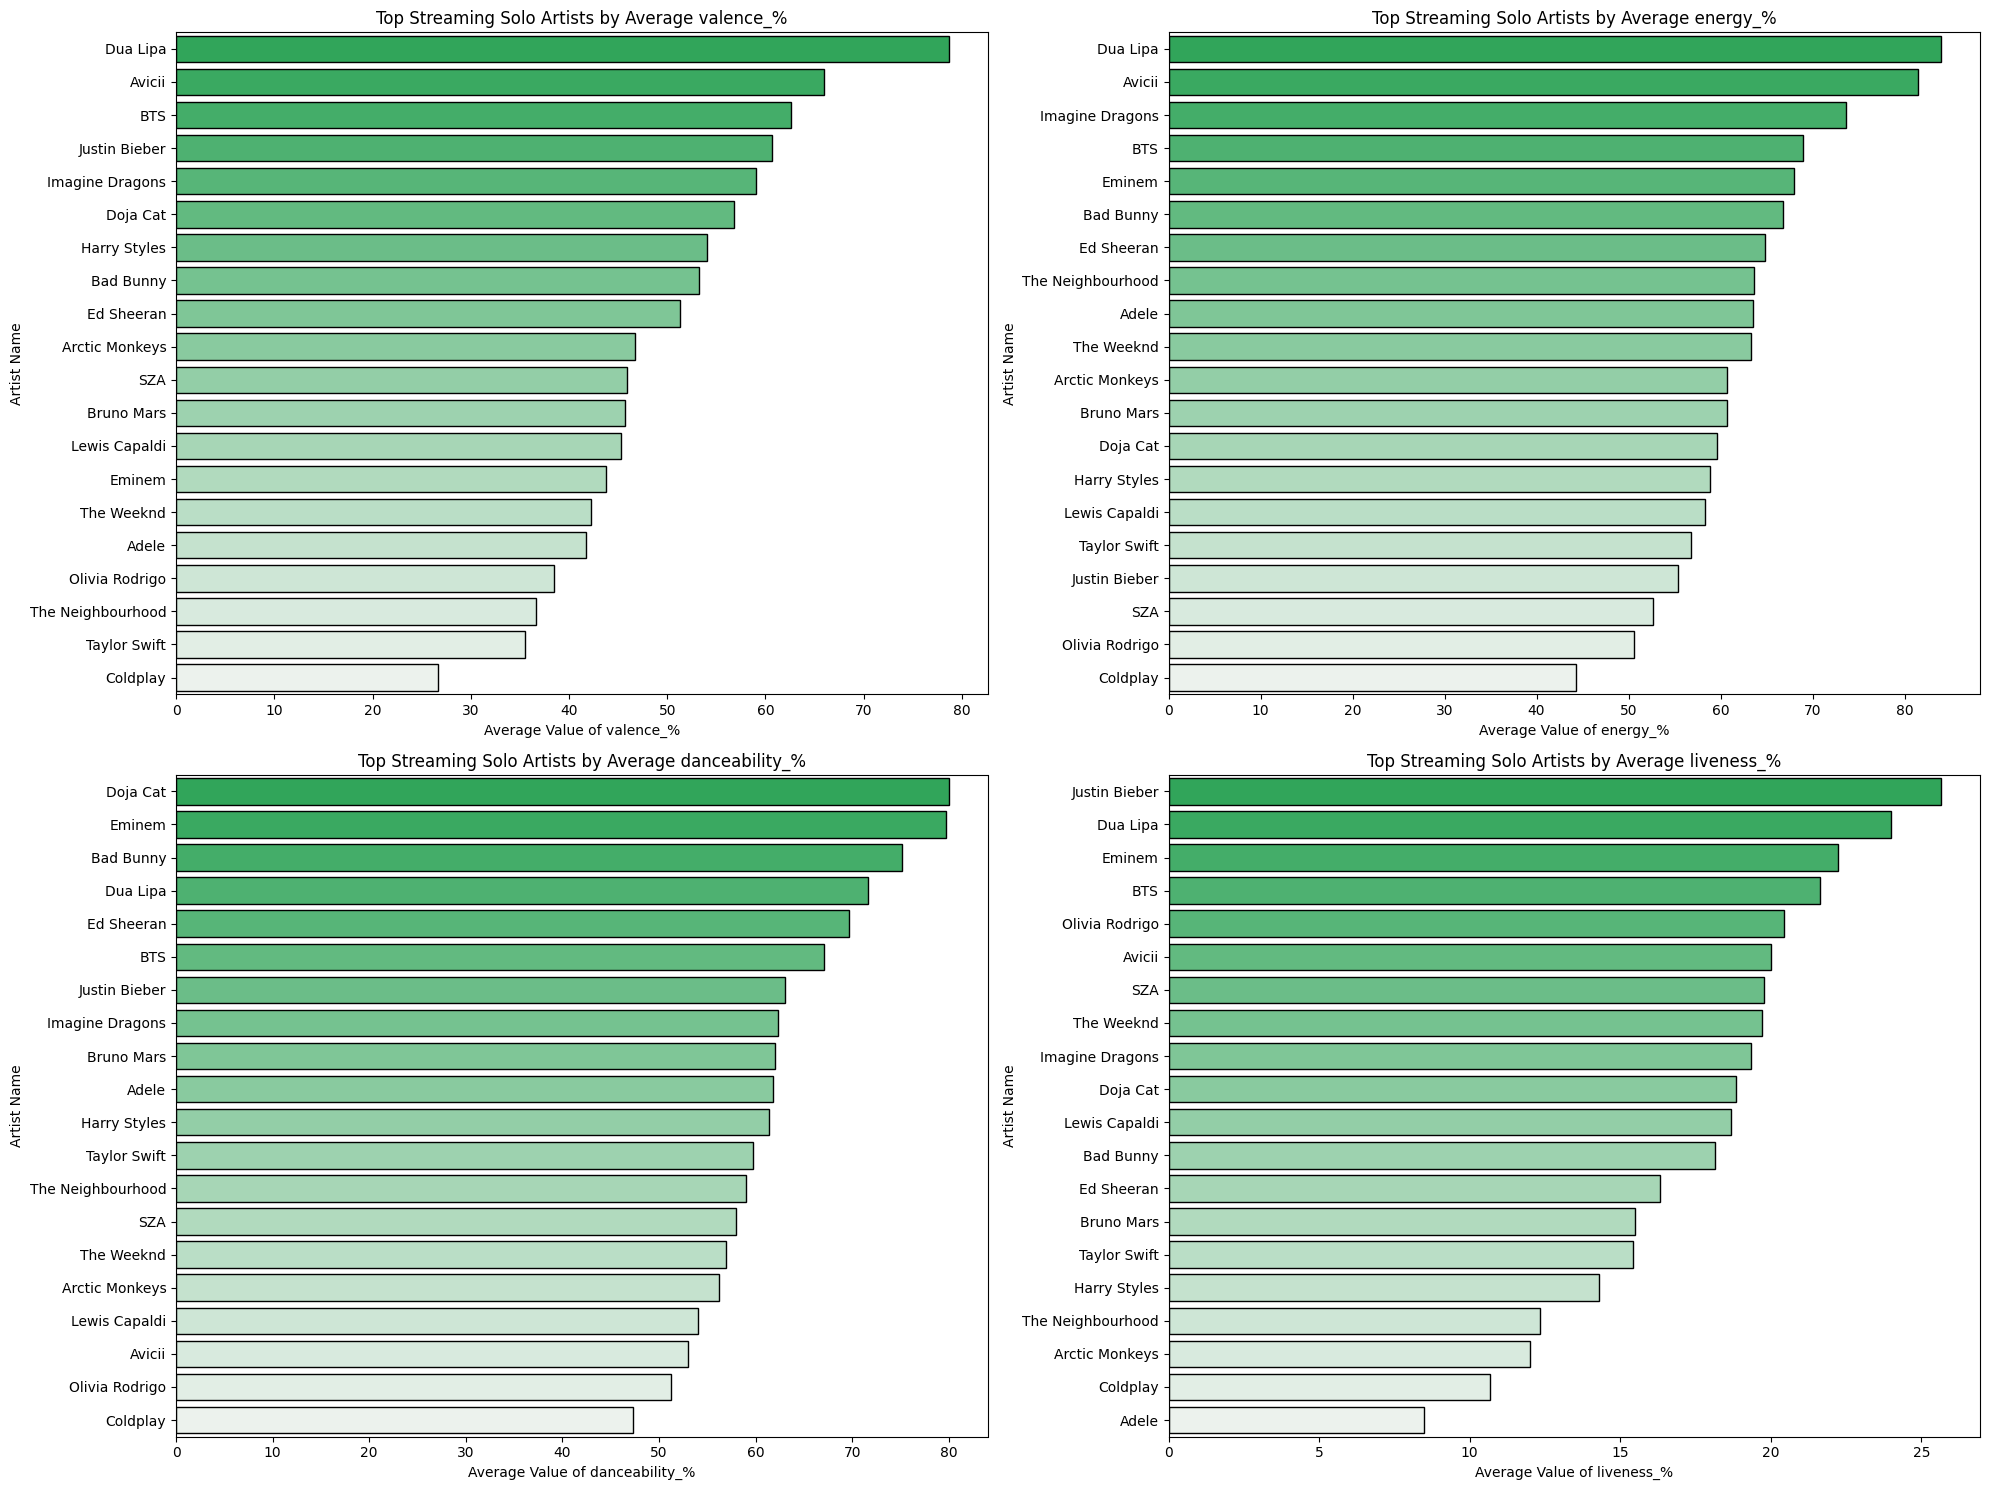

In [ ]:
# sorting the data by solo artist and then group by the artist name and add up all of their streaming number
# then get the top 20

solo_artist = spotify_data[spotify_data['artist_count'] == 1]
top_artists_by_streams = solo_artist.groupby('artist(s)_name')['streams'].sum().nlargest(20)

# filter data frame to include the top streaming solo artist
top_streaming_artists_data = solo_artist[solo_artist['artist(s)_name'].isin(top_artists_by_streams.index)]

# attributes to look at based on top streaming artist
song_attributes = ['valence_%', 'energy_%', 'danceability_%', 'liveness_%']

# set up the matplotlib figure with subplots in a 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

spotify_color = "#1DB954"

spotify_gradient = sns.light_palette(spotify_color, reverse = True, as_cmap=True)


# loop through each attributes and calculate the mean of each attributes for the top streaming artist and then create the plot for each
for i, attribute in enumerate(song_attributes):
    # calculate mean for current attribute for the top streaming artist
    artist_means = top_streaming_artists_data.groupby('artist(s)_name')[attribute].mean().sort_values(ascending=False)
    artist_means_df = artist_means.head(25).reset_index()
    artist_means_df.columns = ['Artist Name', 'Average Value']


    # scale the averages to color map
    norm = plt.Normalize(artist_means_df['Average Value'].min(), artist_means_df['Average Value'].max())
    colors = spotify_gradient(np.linspace(0, 1, len(artist_means_df)))

    #plot the data and include color scale based on the average attribute mean
    sns.barplot(
        x='Average Value',
        y='Artist Name',
        data=artist_means_df,
        ax=axes[i],
        palette=colors,
        edgecolor = 'black'

    )
    axes[i].set_title(f'Top Streaming Solo Artists by Average {attribute}')
    axes[i].set_xlabel(f'Average Value of {attribute}')
    axes[i].set_ylabel('Artist Name')



plt.tight_layout()
plt.show()



#Q5 Release Trends in Top Songs
What are the prevailing trends in number one songs, such as release timing and age, and how do these factors correlate with their specific current streaming success and likelihood of being released at specific times of the year?


3. Trends in Top Songs  - What are the trends of the number one song?
How does the age of a song (time of release) relate to its current streaming success and chart presence?
Is there a particular time of year when the number one songs are more likely to be released? (YueFeng)

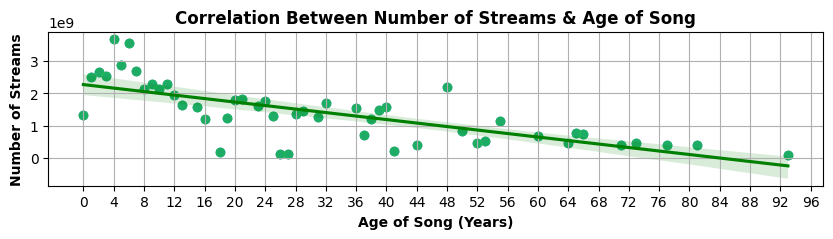

In [ ]:
import seaborn as sns
import numpy as np

top_streamed_songs_by_year = spotify_data.groupby('released_year').apply(lambda group: group.nlargest(1, 'streams')).reset_index(drop=True)
top_streamed_songs_by_year['song_age'] = 2023 - top_streamed_songs_by_year['released_year']

fig, ax = plt.subplots(figsize=(10, 2))
ax.scatter(top_streamed_songs_by_year['song_age'], top_streamed_songs_by_year['streams'])
sns.regplot(x='song_age', y='streams', data=top_streamed_songs_by_year, scatter_kws={'color' : '#1DB954'}, line_kws={'color' : 'green'})
ax.set_xlabel('Age of Song (Years)', weight='bold')
ax.set_ylabel('Number of Streams', weight='bold')
ax.set_title('Correlation Between Number of Streams & Age of Song', weight='bold')
plt.xticks(np.arange(0, top_streamed_songs_by_year['song_age'].max() + 4, 4))
plt.grid()

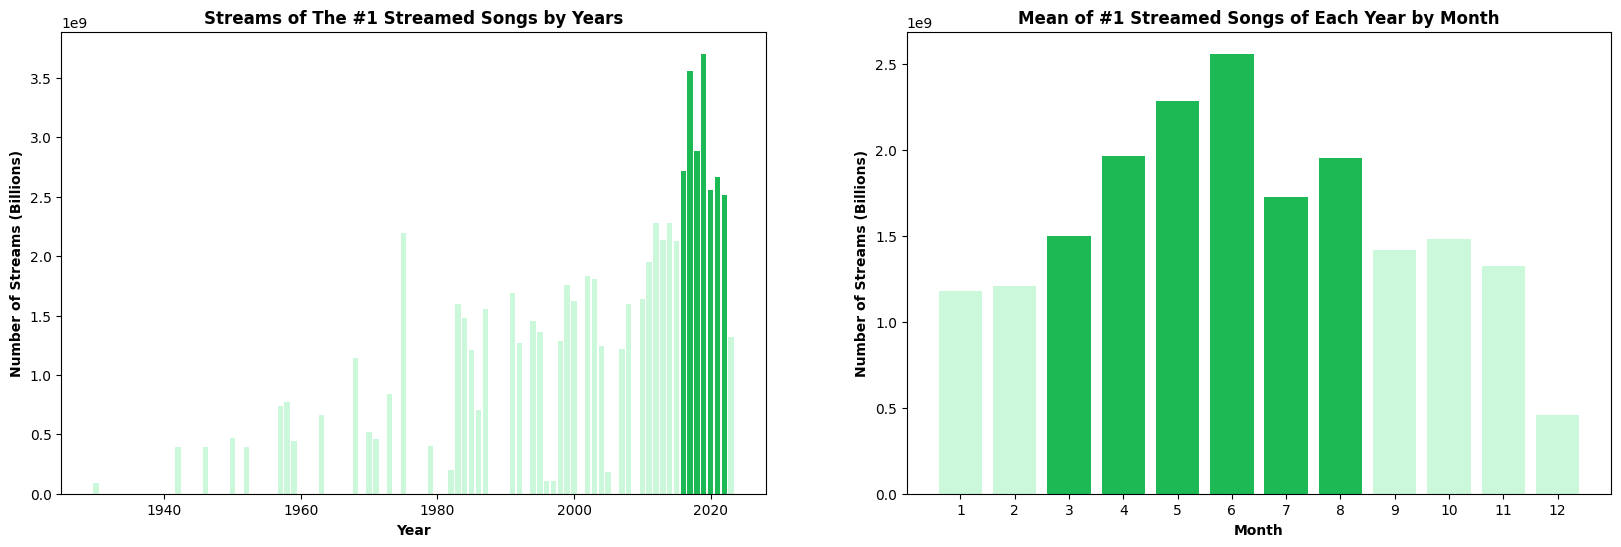

In [ ]:
top_songs_monthly_trends = top_streamed_songs_by_year.groupby('released_month')['streams'].mean()

fig = plt.figure(figsize=(20, 6))

fig.add_subplot(1,2,1)
colors = ['#cbf7da' if year not in [2016, 2017, 2018, 2019, 2020, 2021, 2022] else '#1DB954' for year in top_streamed_songs_by_year['released_year']]
plt.bar(top_streamed_songs_by_year['released_year'], top_streamed_songs_by_year['streams'], color=colors)
plt.ylabel('Number of Streams (Billions)', weight='bold')
plt.xlabel('Year', weight='bold')
plt.title('Streams of The #1 Streamed Songs by Years', weight='bold')

fig.add_subplot(1,2,2)
colors = ['#cbf7da' if month not in [3, 4, 5, 6, 7, 8] else '#1DB954' for month in top_songs_monthly_trends.index]
plt.bar(top_songs_monthly_trends.index, top_songs_monthly_trends.values, color=colors)
plt.xlabel('Month', weight='bold')
plt.ylabel('Number of Streams (Billions)', weight='bold')
plt.title('Mean of #1 Streamed Songs of Each Year by Month', weight='bold')
plt.xticks(range(1, 13))

pass